## 1. Similar Words
+ 如何根据词向量模型找到所有近义词？

### 1.1 读取语料，切词

In [125]:
import pandas as pd

In [126]:
csv_path = '../../DATA/news_data.csv'

In [127]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [128]:
content = content.fillna('')

In [5]:
news_content = content['content'].tolist()

In [6]:
import jieba

In [7]:
def cut(string):
    return ' '.join(jieba.cut(string))

In [9]:
import re

In [10]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [11]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [12]:
news_content = [token(n) for n in news_content]

In [14]:
news_content[0]

['此外',
 '自本周',
 '6月12日',
 '起',
 '除小米手机6等15款机型外',
 '其余机型已暂停更新发布',
 '含开发版',
 '体验版内测',
 '稳定版暂不受影响',
 '以确保工程师可以集中全部精力进行系统优化工作',
 '有人猜测这也是将精力主要用到MIUI',
 '9的研发之中',
 'MIUI',
 '8去年5月发布',
 '距今已有一年有余',
 '也是时候更新换代了',
 '当然',
 '关于MIUI',
 '9的确切信息',
 '我们还是等待官方消息']

In [15]:
news_content = [''.join(n) for n in news_content]

In [ ]:
news_content = [cut(n) for n in news_content]

In [21]:
news_content[0]

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息'

In [22]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows10 桌面 平台 认证 的 ARM 处理器 高通 强调 不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心 相反 他们 正 联手 微软 找到 一种 适合 桌面 平台 的 兼顾 性能 和 功耗 的 完美 方案 报道 称 微软 已经 拿到 了 一些 新 的 源码 以便 Windows10 更好 地 理解 biglittle 架构 资料 显示 骁龙 835 作为 一款 集成 了 CPUGPU 基带 蓝牙 WiFi 的 SoC 比 传统 的 Wintel 方案 可以 节省 至少 30 的 PCB 空间 按计划 今年 Q4 华硕 惠普 联想 将 首发 骁龙 835Win10 电脑 预计 均 是 二合一 形态 的 产品 当然 高通 骁龙 只是 个 开始 未来 也许 还 能 见到 三星 Exynos 联发科 华为 麒麟 小米 澎湃 等 进入 Windows10 桌面 平台'

###  1.2 训练词向量

In [28]:
FILE_PATH = '../../DATA/news_data_cut.txt'

In [23]:
with open(FILE_PATH, 'w') as f:
    for n in news_content:
        f.write(n + '\n')

In [25]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [26]:
news_word2vec = Word2Vec(LineSentence(FILE_PATH), size=35, workers=8)

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [27]:
news_word2vec.wv.most_similar('葡萄牙', topn=20)

[('捷克', 0.8467614054679871),
 ('意大利', 0.8356108665466309),
 ('巴林', 0.8313027024269104),
 ('拉脱维亚', 0.8186264634132385),
 ('科特迪瓦', 0.8145321607589722),
 ('奥地利', 0.8106111288070679),
 ('克罗地亚', 0.8031169772148132),
 ('乌拉圭', 0.7989460229873657),
 ('摩洛哥', 0.7856804132461548),
 ('瑞典', 0.7852790355682373),
 ('里斯本', 0.782902181148529),
 ('西班牙', 0.7800700664520264),
 ('斯洛伐克', 0.7794532775878906),
 ('斯洛文尼亚', 0.779364824295044),
 ('秘鲁', 0.7778058648109436),
 ('马赛', 0.7777087688446045),
 ('索', 0.7751511931419373),
 ('巴拉圭', 0.774207592010498),
 ('罗马', 0.7735648155212402),
 ('比利时', 0.7709126472473145)]

In [31]:
news_word2vec.wv.most_similar('篮球', topn=15)

[('足球', 0.7735739350318909),
 ('田径', 0.7415525913238525),
 ('NBA', 0.7408760786056519),
 ('排球', 0.7138184309005737),
 ('亚锦赛', 0.6996064782142639),
 ('猛龙', 0.6834888458251953),
 ('赛况', 0.6832334995269775),
 ('乒乓球', 0.6757427453994751),
 ('CBA', 0.6666591763496399),
 ('羽毛球', 0.6656644940376282),
 ('季后赛', 0.665238618850708),
 ('湖人胜', 0.6541772484779358),
 ('总决赛', 0.6377079486846924),
 ('搏击', 0.6339247822761536),
 ('体操', 0.6326093673706055)]

+ **总结**：
    + 有些错误的词原因可能是分词的问题
    + 数据量越多，效果越好，如果维基百科加进来训练，那么同义词就要好很多；

In [32]:
news_word2vec.wv.most_similar('意大利', topn=50)

[('瑞士', 0.8384034633636475),
 ('葡萄牙', 0.8356108069419861),
 ('捷克', 0.8334101438522339),
 ('西班牙', 0.8272196054458618),
 ('苏格兰', 0.8212078809738159),
 ('比利时', 0.8154182434082031),
 ('奥地利', 0.8091213703155518),
 ('加拿大', 0.8035169243812561),
 ('德国', 0.8001338243484497),
 ('法国', 0.7775880098342896),
 ('拉脱维亚', 0.7671105861663818),
 ('乌克兰', 0.7647632360458374),
 ('丹麦', 0.758065402507782),
 ('澳大利亚', 0.749191164970398),
 ('新加坡', 0.7488256692886353),
 ('墨西哥', 0.7475632429122925),
 ('罗马', 0.7442277669906616),
 ('保加利亚', 0.7399458289146423),
 ('爱尔兰', 0.7322176694869995),
 ('柏林', 0.7269946932792664),
 ('巴林', 0.7260223031044006),
 ('瑞典', 0.7244898080825806),
 ('基辅', 0.7217918038368225),
 ('中国香港', 0.717868983745575),
 ('波兰', 0.7112340331077576),
 ('洛杉矶', 0.70956951379776),
 ('乌拉圭', 0.7088664770126343),
 ('秘鲁', 0.7076147794723511),
 ('南非', 0.7075499296188354),
 ('悉尼', 0.7061508297920227),
 ('罗马尼亚', 0.7054810523986816),
 ('马德里', 0.7049707770347595),
 ('匈牙利', 0.7006392478942871),
 ('斯洛文尼亚', 0.69840806722

In [33]:
news_word2vec.wv.most_similar('捷克', topn=20)

[('罗马尼亚', 0.9036349654197693),
 ('拉脱维亚', 0.8837704658508301),
 ('丹麦', 0.8646306991577148),
 ('奥地利', 0.8581551909446716),
 ('斯洛文尼亚', 0.8580074310302734),
 ('葡萄牙', 0.8467613458633423),
 ('乌拉圭', 0.844369649887085),
 ('意大利', 0.8334100842475891),
 ('立陶宛', 0.8330191373825073),
 ('巴林', 0.829979419708252),
 ('克罗地亚', 0.8262550234794617),
 ('匈牙利', 0.8237017393112183),
 ('比利时', 0.8224209547042847),
 ('基辅', 0.8127955794334412),
 ('乌克兰', 0.8076907396316528),
 ('保加利亚', 0.7971646189689636),
 ('巴拉圭', 0.794233500957489),
 ('斯洛伐克', 0.791293740272522),
 ('爱尔兰', 0.7819607257843018),
 ('波兰', 0.7786924839019775)]

In [40]:
news_word2vec.wv.most_similar('说', topn=40)

[('表示', 0.8973590135574341),
 ('认为', 0.8785998225212097),
 ('指出', 0.8641322255134583),
 ('看来', 0.8245151042938232),
 ('坦言', 0.7934929132461548),
 ('说完', 0.7933793067932129),
 ('介绍', 0.7636950016021729),
 ('告诉', 0.7601282596588135),
 ('称', 0.7464898824691772),
 ('明说', 0.7446820735931396),
 ('强调', 0.7438420057296753),
 ('透露', 0.7280871868133545),
 ('文说', 0.7183339595794678),
 ('中说', 0.7044714689254761),
 ('所说', 0.682348906993866),
 ('问', 0.679863691329956),
 ('时说', 0.6763615012168884),
 ('建议', 0.6622211933135986),
 ('提到', 0.6561923623085022),
 ('称赞', 0.6517360210418701),
 ('特别强调', 0.6371873617172241),
 ('相信', 0.6157982349395752),
 ('嚷嚷', 0.5933036804199219),
 ('如是说', 0.5859234929084778),
 ('对此', 0.5814806818962097),
 ('地说', 0.5809550881385803),
 ('普遍认为', 0.5801364183425903),
 ('道', 0.5743571519851685),
 ('说道', 0.5731464624404907),
 ('眼中', 0.5631522536277771),
 ('资深', 0.549139142036438),
 ('强调指出', 0.5453622341156006),
 ('接受', 0.5444324016571045),
 ('的话', 0.5426502227783203),
 ('提醒', 0.541

In [38]:
news_word2vec.wv.most_similar('表示', topn=20)

[('指出', 0.9155016541481018),
 ('认为', 0.9101251363754272),
 ('说', 0.8973590135574341),
 ('透露', 0.8148850202560425),
 ('强调', 0.8089660406112671),
 ('看来', 0.7936033010482788),
 ('坦言', 0.7880643606185913),
 ('称', 0.7440857291221619),
 ('介绍', 0.7410342693328857),
 ('建议', 0.7253350019454956),
 ('普遍认为', 0.6942833662033081),
 ('中说', 0.6862101554870605),
 ('时说', 0.6839657425880432),
 ('说完', 0.664004921913147),
 ('提到', 0.6631457209587097),
 ('告诉', 0.6611047983169556),
 ('对此', 0.6581898927688599),
 ('接受', 0.637292206287384),
 ('文说', 0.6345674991607666),
 ('特别强调', 0.6184481382369995)]

In [41]:
from collections import defaultdict

In [50]:
def get_related_words(initial_words, model):
    """
    @initial_words are initial words we already know
    @model  is the word2vec model
    """
    unseen = initial_words
    # 每个单词在搜索过程中出现的次数
    seen = defaultdict(int)
    
    max_size = 1000
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0:
            print('seen length:{}'.format(len(seen)))
        
        node = unseen.pop(0)
        new_expanding = [w for w, s in model.wv.most_similar(node, topn=20)]
        unseen += new_expanding
        seen[node] += 1
    
    return seen

In [51]:
related_words = get_related_words(['说', '表示'], news_word2vec)

seen length:0
seen length:50
seen length:50
seen length:50
seen length:50
seen length:50
seen length:50
seen length:50
seen length:100
seen length:100
seen length:100
seen length:100
seen length:100
seen length:150
seen length:150
seen length:200
seen length:200
seen length:250
seen length:250
seen length:300
seen length:350
seen length:400
seen length:400
seen length:400
seen length:450
seen length:450
seen length:450
seen length:500
seen length:550
seen length:600
seen length:650
seen length:700
seen length:750
seen length:800
seen length:850
seen length:900
seen length:950


In [46]:
len(news_word2vec.wv.vocab)

99789

In [52]:
# 根据出现次数排序
sorted(related_words.items(), key=lambda x:x[1], reverse=True)

[('说', 130),
 ('表示', 128),
 ('认为', 126),
 ('坦言', 109),
 ('指出', 108),
 ('透露', 103),
 ('看来', 95),
 ('称', 95),
 ('提到', 90),
 ('说完', 85),
 ('告诉', 70),
 ('介绍', 67),
 ('文说', 62),
 ('明说', 59),
 ('所说', 59),
 ('普遍认为', 58),
 ('中说', 54),
 ('称赞', 54),
 ('建议', 53),
 ('强调', 51),
 ('特别强调', 50),
 ('对此', 43),
 ('相信', 40),
 ('时说', 38),
 ('问', 36),
 ('表明', 33),
 ('地说', 33),
 ('说道', 33),
 ('质疑', 31),
 ('中称', 29),
 ('接受', 24),
 ('直言', 24),
 ('强调指出', 24),
 ('说明', 24),
 ('如是说', 22),
 ('提及', 22),
 ('祁', 21),
 ('感谢', 21),
 ('写道', 21),
 ('呼吁', 19),
 ('声称', 19),
 ('列举', 18),
 ('解释', 18),
 ('批评', 17),
 ('谈到', 16),
 ('王俪桦', 16),
 ('猜测', 16),
 ('坦承', 15),
 ('深有体会', 15),
 ('感慨', 15),
 ('知情', 15),
 ('看到', 14),
 ('回答', 14),
 ('谈论', 14),
 ('眼中', 13),
 ('主任', 13),
 ('描述', 13),
 ('反映', 12),
 ('肯定', 12),
 ('证实', 12),
 ('具名', 12),
 ('请问', 12),
 ('否认', 11),
 ('赞赏', 11),
 ('引用', 11),
 ('希望', 11),
 ('来说', 10),
 ('而言', 10),
 ('彩霞', 10),
 ('美国康奈尔大学', 10),
 ('估计', 10),
 ('嚷嚷', 9),
 ('了然于心', 9),
 ('托说', 9),
 ('问据', 9),
 ('聊起', 9)

## 优化点
- seen 打分优化，不只是简单加1
- 重复搜索使用递归 + lru cache

## 2. TF-IDF : 提取 Key words
+ 任意输入一篇文章，提取出关键字(key words)
+ 关键词的特征：
    + 在文章中出现的频率较高
    + 在文章1出现了，但是其他文章中出现的很少

In [3]:
news_content = []
with open('../../DATA/news_data_cut.txt', 'r') as f:
    for line in f:
        news_content.append(line)

In [4]:
news_content[0]

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息\n'

In [4]:
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

In [6]:
document_frequency('小米')

100

In [5]:
document_frequency('的')

70342

In [7]:
import math

In [8]:
def idf(word):
    return math.log10(len(news_content)/ document_frequency(word))

In [9]:
idf('的')

0.1051466115514474

In [10]:
idf('小米')

2.9523613237924735

In [11]:
def tf(word, document):
    words = document.split()
    return sum(1 for w in words if w == word)

In [12]:
news_content[11]

'巨丰 早评 市场 将 再次 探底 巨丰 观点 周四 大盘 冲高 回落 2500 余 只 个股 下跌 上证 50 沪 深 300 指数 顽强 收红 早盘 大盘 低开 高 走 展开 反弹 沪 指 冲破 120 日 均线 压力 位 午后 大盘 跳水 个股 普跌 盘面 上 保险 电力 银行 民航机场 券商 房地产 人工智能 迪士尼 网络安全 等 板块 涨幅 居前 雄安 新区 福州 新区 医疗器械 丝绸之路 等 跌幅 居前 金融股 全线 大涨 保险 板块 涨 3 新华 保险 中国 太保 中国 人寿 涨 4 中国 平安 涨 2 西水股份 天茂 集团 盘中 大涨 7 以上 银行 板块 涨 2 招商银行 大涨 8 贵阳 银行 兴业银行 浦发银行 兴业银行 等 涨幅 居前 金融股 是 A股 纳入 MSCI 指数 的 受益者 后市 可以 逢 低 关注 盘中 万达 电影 复星 医药 等 白马股 闪崩 导致 午后 市场 出现 大幅 跳水 盘后 消息 银监会 于 6 月 中旬 要求 各家 银行 排查 包括 万达 海航 集团 复星 浙江 罗森 内里 在内 数家 企业 的 授信 及 风险 分析 排查 对象 多 是 近年来 海外投资 比较 凶猛 在 银行业 敞口 较大 的 民营企业 集团 巨丰 投顾 认为 自 5 月 以来 大盘 已经 走出 了 3 重底 的 走势 并 开启 中级 反弹 行情 沪 指 在 上证 50 及 白马股 推动 下 率先 反弹 但 遭遇 60 日 120 日 均线 强 压力 而 出现 调整 MSCI 纳入 A股 后 沪 深 300 指数 创 17 个 月 新高 但 2500 余股 下跌 市场 分化 明显 随着 6 月末 市场 流动性 紧张 的 可能 出现 市场 将 再次出现 探底 建议 投资者 重点 关注 半年报 大幅 预增 的 错 杀 股 和 具备 估值 优势 的 大 蓝筹 天信 投资 尾盘 跳水 原因 揭秘 伏击 的 品种 曝光 周四 市场 点评 沪 深 两市 早盘 纷纷 低开 但是 开盘 之后 权重 板块 崛起 其中 保险 和 银行 表现 尤其 明显 低矮 动 股指 快速 拉升 并 顺势 突破 了 60 日 均线 和 半年线 的 束缚 在 主板 拉升 的 过程 中 市场 的 分化 格局 也 较 明显 题材 板块 和 创业板 表现 相对 较弱 不过 虽然 市场 在 早盘

In [13]:
tf('市场', news_content[11])

20

In [15]:
tf('崛起', news_content[11])

2

In [16]:
tf('创业板', news_content[11])

6

In [17]:
idf('市场')

1.0676225860228419

In [19]:
idf('银行')

1.4550169427748936

In [20]:
idf('创业板')

2.506757120518876

In [23]:
def get_keywords_of_a_document(document):
    words = set(document.split())
    tfidf = [(w, tf(w, document) * idf(w)) for w in words]
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    return tfidf

In [24]:
get_keywords_of_a_document(news_content[11])

[('市场', 21.352451720456838),
 ('股指', 18.183467417442838),
 ('周四', 17.26088617439966),
 ('均线', 15.505514875366993),
 ('板块', 15.184208429020511),
 ('创业板', 15.040542723113257),
 ('沪', 14.096891190311872),
 ('反弹', 11.40131732928378),
 ('巨丰', 11.244724023409647),
 ('普涨', 11.1657372072426),
 ('居前', 10.78835527475667),
 ('午后', 10.722078869023898),
 ('早盘', 10.614032989531069),
 ('大盘', 10.528860150725679),
 ('保险', 9.712428450401568),
 ('跳水', 9.392541082832015),
 ('具备', 9.384071811999714),
 ('局部性', 8.950480138145622),
 ('走势', 8.886316192504337),
 ('回落', 8.85749598983617),
 ('银行', 8.730101656649362),
 ('大涨', 8.113164172292002),
 ('涨幅', 7.982850978349081),
 ('阴线', 7.904722647584947),
 ('普跌', 7.676835942971274),
 ('上影线', 7.552540129473584),
 ('半年线', 7.552540129473584),
 ('题材', 7.529644664184074),
 ('个股', 7.317431171173604),
 ('伏击', 7.0747759516433115),
 ('探底', 7.010406584900509),
 ('行情', 6.978062869252294),
 ('兴业银行', 6.560526931713512),
 ('沪市', 6.52433048752792),
 ('复星', 6.472715960315349),
 ('白马股'

### 可以优化的点
+ 减少计算时间, tf提前计算；
+ 重复计算的单词可以保存；

In [25]:
# 使用prun计算程序耗时，找到可以优化的点
%prun get_keywords_of_a_document(news_content[11])

## 3. Word Cloud
+ 关键词展示
+ [https://github.com/amueller/word_cloud](https://github.com/amueller/word_cloud)
+ wordcloud支持中文需要安装字体：[https://github.com/Computing-Intelligence/datasource/blob/master/SourceHanSerifSC-Regular.otf](https://github.com/Computing-Intelligence/datasource/blob/master/SourceHanSerifSC-Regular.otf)

In [26]:
import wordcloud

In [27]:
wc = wordcloud.WordCloud('⁨../../../../Documents/Softwares/wordcloud/SourceHanSerifSC-Regular.otf')

### 3.1 wordcloud展示1

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
news_key_words = get_keywords_of_a_document(news_content[101])

In [30]:
news_key_words_dict = {w:score for w, score in news_key_words}

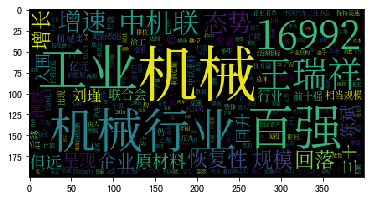

In [31]:
plt.imshow(wc.generate_from_frequencies(news_key_words_dict))

### 3.2 wordcloud展示2

In [51]:
stock_news = get_keywords_of_a_document(news_content[10])

In [52]:
stock_news

[('蓝筹股', 8.663710003696664),
 ('私募', 5.837875136611048),
 ('成长', 5.364918095697066),
 ('行情', 4.6520419128348625),
 ('业绩', 4.385386958205686),
 ('股行情', 4.253391319456455),
 ('此消彼长', 3.838417971485637),
 ('王道', 3.806233288114236),
 ('wwwstcncom06', 3.3841595997254785),
 ('强于', 3.3725777271756634),
 ('再起', 3.3612967167659744),
 ('成长性', 3.17421007340883),
 ('推动力', 3.126286521091647),
 ('证券时报', 3.1072632837782166),
 ('上证综指', 2.9885734964469184),
 ('一时间', 2.922977546107264),
 ('蓝筹', 2.7939988316972237),
 ('人士', 2.7918764048423768),
 ('切换', 2.7244746191788),
 ('日讯据', 2.7219124024142),
 ('上证', 2.628078868494781),
 ('估值', 2.5161986767517175),
 ('匹配', 2.513028629962211),
 ('创业板', 2.506757120518876),
 ('本轮', 2.381818383910576),
 ('看好', 2.345979958681869),
 ('绝对', 2.1613728487036576),
 ('多位', 2.107884148046792),
 ('月初', 2.083716885397648),
 ('并非', 1.9589250932948619),
 ('预期', 1.7988513344916361),
 ('指数', 1.7780107263130935),
 ('突出', 1.739907362752198),
 ('上涨', 1.73461425052968),
 ('上述', 1.72964485

In [53]:
stock_news_dict = {w:score for w, score in stock_news}

In [16]:
from PIL import Image
import numpy as np

In [54]:
wc_mask = np.array(Image.open('img/wordcloud_bg.png'))

In [61]:
wordcloud_with_mask = wordcloud.WordCloud(font_path='../../../../Documents/Softwares/wordcloud/SourceHanSerifSC-Regular.otf',
                                         mask=wc_mask,
                                         background_color='black')

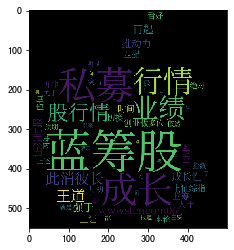

In [62]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies(stock_news_dict))

## 4.  TF-IDF Vectorized
+ 将每一篇文章都用tf-idf表示出来，从而将文本向量化；
+ 向量化的文本可以直接判断相似度；

### 4.1 向量化

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorized = TfidfVectorizer(max_features=10000)

In [7]:
news_content[:10]

['此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息\n',
 '骁龙 835 作为 唯一 通过 Windows10 桌面 平台 认证 的 ARM 处理器 高通 强调 不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心 相反 他们 正 联手 微软 找到 一种 适合 桌面 平台 的 兼顾 性能 和 功耗 的 完美 方案 报道 称 微软 已经 拿到 了 一些 新 的 源码 以便 Windows10 更好 地 理解 biglittle 架构 资料 显示 骁龙 835 作为 一款 集成 了 CPUGPU 基带 蓝牙 WiFi 的 SoC 比 传统 的 Wintel 方案 可以 节省 至少 30 的 PCB 空间 按计划 今年 Q4 华硕 惠普 联想 将 首发 骁龙 835Win10 电脑 预计 均 是 二合一 形态 的 产品 当然 高通 骁龙 只是 个 开始 未来 也许 还 能 见到 三星 Exynos 联发科 华为 麒麟 小米 澎湃 等 进入 Windows10 桌面 平台\n',
 '此前 的 一加 3T 搭载 的 是 3400mAh 电池 DashCharge 快充 规格 为 5V4A 至于 电池 缩水 可能 与 刘作 虎 所说 一加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关 按照 目前 掌握 的 资料 一加 手机 5 拥有 55 寸 1080P 三星 AMOLED 显示屏 6G8GBRAM64GB128GBROM 双 1600 万 摄像头 备货 量 惊喜 根据 京东 泄露 的 信息 一加 5 起 售价 是 xx99 元 应该 是 在 279928992999 中 的 某个\n',
 '这是 6 月 18 日 在 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 的 被 森林 大火 烧毁 的 汽车 新华社 记者 张立 云摄\n',
 '原 标题 44 岁 女子

In [141]:
# sample_number = 10000
# sub_samples = news_content[:sample_number]

In [8]:
X = vectorized.fit_transform(news_content)

In [9]:
X.shape

(89611, 10000)

In [10]:
vectorized.vocabulary_

{'此外': 6208,
 '本周': 5899,
 '12': 32,
 '日起': 5632,
 '小米': 3996,
 '手机': 4891,
 '15': 46,
 '其余': 1841,
 '暂停': 5753,
 '更新': 5773,
 '发布': 2628,
 '开发': 4425,
 '影响': 4554,
 '确保': 7352,
 '工程师': 4158,
 '可以': 2726,
 '集中': 9615,
 '全部': 1745,
 '精力': 7686,
 '进行': 9115,
 '工作': 4140,
 '有人': 5819,
 '猜测': 6901,
 '主要': 934,
 '研发': 7333,
 '之中': 955,
 '去年': 2543,
 '一年': 327,
 '时候': 5649,
 '当然': 4531,
 '关于': 1819,
 '信息': 1556,
 '我们': 4824,
 '还是': 9061,
 '等待': 7623,
 '作为': 1452,
 '唯一': 2960,
 '通过': 9224,
 '平台': 4284,
 '认证': 8560,
 '强调': 4507,
 '不会': 572,
 '因为': 3038,
 '考虑': 8004,
 '性能': 4665,
 '核心': 6078,
 '相反': 7228,
 '他们': 1261,
 '联手': 8042,
 '微软': 4601,
 '找到': 4964,
 '一种': 372,
 '适合': 9167,
 '兼顾': 1862,
 '完美': 3798,
 '方案': 5560,
 '报道': 5037,
 '已经': 4183,
 '拿到': 5113,
 '一些': 279,
 '以便': 1276,
 '更好': 5770,
 '理解': 6987,
 '架构': 6034,
 '资料': 8796,
 '显示': 5722,
 '一款': 359,
 '集成': 9621,
 '传统': 1370,
 '节省': 8212,
 '至少': 8145,
 '30': 102,
 '空间': 7512,
 '按计划': 5142,
 '今年': 1234,
 '联想': 8041,
 '首发': 9813,
 '电脑': 70

In [11]:
X[0]

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 35 stored elements in Compressed Sparse Row format>

每篇文章的向量都是一个稀疏矩阵 sparse matrix。

In [12]:
news_content[0]

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息\n'

In [14]:
len(news_content[0])

226

看第一个向量的那些元素不是0：

In [17]:
np.where(X[0].toarray()) # get the positions which values are not zeros

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  32,   46,  327,  934,  955, 1556, 1745, 1819, 1841, 2543, 2628,
        2726, 3996, 4140, 4158, 4425, 4531, 4554, 4824, 4891, 5632, 5649,
        5753, 5773, 5819, 5899, 6208, 6901, 7333, 7352, 7623, 7686, 9061,
        9115, 9615]))

例如第32个元素不是0，对应到单词表中是单词 12，第3996个单词是小米。

In [18]:
vectorized.vocabulary_

{'此外': 6208,
 '本周': 5899,
 '12': 32,
 '日起': 5632,
 '小米': 3996,
 '手机': 4891,
 '15': 46,
 '其余': 1841,
 '暂停': 5753,
 '更新': 5773,
 '发布': 2628,
 '开发': 4425,
 '影响': 4554,
 '确保': 7352,
 '工程师': 4158,
 '可以': 2726,
 '集中': 9615,
 '全部': 1745,
 '精力': 7686,
 '进行': 9115,
 '工作': 4140,
 '有人': 5819,
 '猜测': 6901,
 '主要': 934,
 '研发': 7333,
 '之中': 955,
 '去年': 2543,
 '一年': 327,
 '时候': 5649,
 '当然': 4531,
 '关于': 1819,
 '信息': 1556,
 '我们': 4824,
 '还是': 9061,
 '等待': 7623,
 '作为': 1452,
 '唯一': 2960,
 '通过': 9224,
 '平台': 4284,
 '认证': 8560,
 '强调': 4507,
 '不会': 572,
 '因为': 3038,
 '考虑': 8004,
 '性能': 4665,
 '核心': 6078,
 '相反': 7228,
 '他们': 1261,
 '联手': 8042,
 '微软': 4601,
 '找到': 4964,
 '一种': 372,
 '适合': 9167,
 '兼顾': 1862,
 '完美': 3798,
 '方案': 5560,
 '报道': 5037,
 '已经': 4183,
 '拿到': 5113,
 '一些': 279,
 '以便': 1276,
 '更好': 5770,
 '理解': 6987,
 '架构': 6034,
 '资料': 8796,
 '显示': 5722,
 '一款': 359,
 '集成': 9621,
 '传统': 1370,
 '节省': 8212,
 '至少': 8145,
 '30': 102,
 '空间': 7512,
 '按计划': 5142,
 '今年': 1234,
 '联想': 8041,
 '首发': 9813,
 '电脑': 70

非0元素就表示对应单词表中的tf-idf值。

In [216]:
X.toarray()[0][32]

0.10802738241250673

In [19]:
X.toarray()[0][3996]

0.23726851939585855

### 4.2 计算文章的相似度

In [20]:
import random

随机选取两篇文章：

In [66]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [67]:
document_id_1, document_id_2

(347, 205)

In [68]:
news_content[document_id_1]

'平野 美宇 但国 乒 总教头 刘国梁 却 不以为然 刘国梁 认为 平野 美宇 不足 为惧 这样 水平 的 球员 在 中国 一抓 一大 把 而且 刘国梁 用 实际行动 证明 了 自己 的 言论 在 德国 世乒赛 上 中国队 团灭 日本 球员 无论是 神童 张本 智 和 平野 美宇 伊藤美诚 还是 石川 佳 纯水 谷 隼 都 没有 逃脱 中国队 的 五指山 丁宁 更是 强势 复仇 平野 美宇 中国队 包揽 了 世乒赛 的 男女 单打 男女 双打 的 四块 金牌 强势 回应 即便 这样 日本 人 还 不服 认为 平野 美宇 张本 智 和 等 球员 与 中国队 的 主力 相比 还 能 年轻 大赛 经验不足 输掉 比赛 也 很 正常 中国队 赢得 没什么 说服力 平野 美宇 和 张本 智 和 更是 扬言 要 在 日本 公开赛 上 战胜 中国 球员 夺冠 不服 就 继续 来战 在 日本 公开赛 中 刘国梁 派出 了 一众 陪练 出战 丁宁 刘诗雯 朱雨玲 等 主力 皆 高 挂 免战牌 即便 是 这样 日本 还是 没能 占 到 一丁点 便宜 而且 输 得 更惨 99 年 的 王曼昱 截杀 日本 一姐 石川 佳纯虐 哭 日本 新星 伊藤美诚 陈梦 横扫 平野 美宇 梁靖 崑 斩杀 张本 智 和 樊振东 痛击 日本 一哥 水谷 隼 00 后 孙颖莎 更是 在 自己 的 第一次 国际 大赛 上 夺得 双冠王 中国队 再次 包揽 所有 冠军 毫无 悬念 这些 陪练 也许 是 刘国梁 在 东京 奥运会 的 秘密武器 这次 日本 彻底 服 了 日本 球员 坦然 承认 差距 日本 球迷 也 认为 东京 奥运会 日本 夺冠 基本 无望 有 一句 话 来 形容 再 贴切 不过 了 就 喜欢 你 看不惯 我 又 干 不 掉 我 的 样子 孔令辉 恐惧 的 事情 刘国梁 没有 让 它 再 发生 从 世乒赛 到 日本 公开赛 不 懂球 的 胖子 用 20 天 的 时间 两次 打脸 孔令辉 日本 技术 超越 中国 没有 的 事 国际乒联 中国 公开赛 将 于 20 日 开打 日本队 派出 了 42 名 球员 参赛 占 了 参赛 总 人数 的 三分之一 但 张本 智 和 水谷 隼 却 退赛 了 可能 是 被 中国 虐怕 了 参赛 人数 再 多 结果 也 不会 改变 有 球迷 说 日本 人 这 是 来 中国

In [69]:
news_content[document_id_2]

'原 标题 崔永元 网上 食品 商城 咋 卖 那么 贵 日前 名为 璞 谷塘 商城 的 生鲜 电商 网站 悄然 上线 该 网站 的 拥有者 为 璞 谷塘 崔永元 食品 文化交流 俱乐部 有限公司 这是 崔永元 在 宣称 自己 要 进入 零售 领域 后 实际 迈出 的 一步 从 反转 斗士 到 专职 商人 崔永元 将 近期 目标 锁定 在 食品 零售 领域 不过 璞 谷塘 商城 中 售卖 的 商品 高于 市价 5 倍 以上 这些 附加值 从何而来 呢 近日 崔永元 签名 的 璞 谷塘 商城 已经 悄然 上线 主打 非 转基因 食品 在 商城 首页 有 一个 大大的 崔永元 头像 璞 谷塘 悄然 上线 北京青年报 记者 在 璞 谷塘 商城 网页 中 看到 璞 谷塘 主要 出售 食品 包括 生鲜 粮油 副食 酒水 等 璞 谷塘 宣称 做 绿色 健康 的 食品 商城 网站 简介 上 写 着 公司 以 绿色 健康 的 主旨 让 大家 吃 上 放心 安全 的 食品 进入 商城 网站 后 用户 被 要求 选择 地区 目前 只有 北京 和 辽宁大连 两个 市是 红色 字体 可以 被 点击 这 说明 网站 的 配送 范围 仅限 这 两个 城市 目前 璞 谷塘 商城 还 处于 试运营 阶段 网站 只能 浏览 不能 下单 购买 北青报 记者 看到 在 商城 首页 上 有 入驻 商家 一栏 现在 只有 官方 自营 店 上架 了 36 件 商品 该 商城 后续 或 对 其他 商家 开放 其官 网 显示 的 客服 400 电话 和 客服 QQ 也 尚未 开启 从 反转 斗士 到 专职 商人 拥有 主持人 教授 导演 等 众多 身份 的 崔永元 近几年 以反 转基因 斗士 为 标签 2014 年 崔永元 发布 自费 100 万元 赴美 考察 拍摄 关于 转基因 的 纪录片 片中 引用 了 多位 美国 民众 专家 的 意见 和 经历 以此 来 说明 转基因 食品 对 身体 有害 纪录片 发布 后 方舟子 公开 质疑 崔永元 拍摄 的 纪录片 内容 和 目的 两人 就 转基因 食品 能 不能 吃 的 问题 展开 争论 甚至 上升 到 人身攻击 最后 对簿公堂 此后 崔永元 在 多个 场合 宣称 转基因 食品 的 不 安全性 2016 年 在 中国 全 零售 大会 上 崔永元 公开 表示 自己 已经 

In [25]:
vecotor_of_d1 = X[document_id_1].toarray()[0]

In [26]:
vecotor_of_d2 = X[document_id_2].toarray()[0]

再随机选取一篇文章：

In [62]:
random_choose = random.randint(0, 1000)
random_choose

273

In [63]:
news_content[random_choose]

'游走 在 资本 市场 一线 和 各类 金融机构 打交道 的 深圳 某 投资 机构 渠道 经理 刘先生 从 去年 开始 就 感受 到 了 一个 变化 很多 金融机构 已经 开始 主动 了解 期货市场 并 逐渐 重视 起 商品 期货 类 资产 配置 这 已经 成为 一个 非常明显 的 趋势 去年 大宗 商品 尤其 是 黑色 系 涨势 如虹令 国内 资本 市场 各方 侧目 其 背后 大宗 商品 期货市场 流动性 的 显著 改善 也 由此 受到 关注 商品 期市 对 资本 容纳 度 大幅 提升 令 一些 机构 投资 跃跃欲试 在 业内人士 看来 未来 金融机构 产品 与 商品 期货 融合 有三大 途径 需求 上升 推动 商品 期 市 扩容 大宗 商品 期货 通俗 来讲 就是 原材料 矿产资源 农产品 等 产品 的 一种 交易 形式 致力于 提升 价格 的 公允 度 和 透明性 中国 是 多种 大宗 商品 的 主要 生产 及 消费国 对 商品价格 的 形成 举足轻重 据 证监会 统计数据 我国 大宗 商品 期货 成交量 已 连续 7 年 位居 世界 第一 2016 年 上海 大连 和 郑州 三家 商品 期货 交易所 共 成交 商品 期货 约 4119 亿张 同比 增长 2726 约 占 全球 商品 期货 与 期权 成交 总量 的 近 六成 份额 方正 中期 期货 研究院 院长 王骏 认为 中国 商品 期货市场 已经 连续 七年 成交量 排名 世界 第一名 这 与 中国 经济总量 规模 上升 密不可分 近年来 中国 的 GDP 保持 连续 上升 2016 年 中国 GDP 更是 超过 70 万亿元 达到 7441 万亿元 折合 成 美元 为 1112 万亿美元 经济总量 继续 排名 世界 第二位 仅次于 美国 随着 中国 经济 规模 的 不断 上升 中国 生产 消费 和 贸易 方面 的 大宗 商品 市场 规模 也 随之 增长 中国 已经 是 主要 大宗 商品 的 最大 生产国 最大 消费国 最大 进口国 和 最大 出口国 特别 是 在 原油 煤炭 焦炭 钢铁 大豆 油脂 白糖 棉花 橡胶 玉米 小麦 聚乙烯 聚丙烯 等 大宗 商品 上 受到 众多 的 大宗 商品 的 现货 贸易 活跃 而且 规模 不断 增长 的 影响 相应 商品 期货市场 的 对冲 风险管理 套利 交易 和 

+ 计算文章向量的相似度：

In [74]:
from scipy.spatial.distance import cosine

In [73]:
def distance(v1, v2):
    return cosine(v1, v2)

测试：

In [44]:
distance([1, 1], [2, 2])

0.0

计算第三篇文章和前两篇文章的相似度：

In [70]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])

0.9771930791930906

In [71]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])

0.8249918431010742

+ 文章1是乒乓球比赛的，文章2是转基因食品，文章3是股市期货，2 和 3相似度相对高一点。

In [75]:
# 查看和列表中所有文章的相似度排序
sorted(list(range(1000)), key=lambda i:distance(X[random_choose].toarray()[0], 
                                                X[i].toarray()[0]))

[273,
 970,
 52,
 14,
 101,
 96,
 64,
 46,
 7,
 21,
 11,
 19,
 5,
 8,
 90,
 98,
 123,
 6,
 60,
 112,
 86,
 71,
 42,
 77,
 117,
 91,
 97,
 108,
 9,
 114,
 47,
 119,
 65,
 109,
 34,
 94,
 23,
 62,
 63,
 38,
 115,
 29,
 107,
 75,
 68,
 106,
 89,
 113,
 22,
 41,
 66,
 120,
 79,
 13,
 95,
 27,
 48,
 40,
 58,
 111,
 81,
 67,
 72,
 28,
 33,
 44,
 26,
 30,
 84,
 88,
 15,
 45,
 4,
 105,
 1,
 57,
 110,
 56,
 61,
 43,
 59,
 16,
 18,
 31,
 83,
 99,
 76,
 104,
 121,
 51,
 93,
 0,
 53,
 20,
 118,
 49,
 54,
 122,
 116,
 124,
 32,
 69,
 10,
 24,
 125,
 17,
 82,
 102,
 70,
 92,
 37,
 73,
 78,
 25,
 80,
 85,
 35,
 87,
 36,
 50,
 55,
 12,
 2,
 3,
 39,
 74,
 100,
 103,
 306,
 455,
 205,
 265,
 630,
 838,
 901,
 943,
 405,
 755,
 849,
 918,
 871,
 995,
 616,
 937,
 389,
 857,
 813,
 808,
 776,
 773,
 245,
 325,
 821,
 663,
 734,
 718,
 844,
 764,
 854,
 632,
 266,
 588,
 476,
 950,
 137,
 811,
 532,
 428,
 237,
 951,
 130,
 927,
 874,
 882,
 710,
 385,
 182,
 779,
 692,
 852,
 528,
 352,
 150,
 328,
 832,


In [77]:
news_content[970]

'6 月 21 日 消息 周二 芝加哥 期货 交易所 CBOT 农产品 期货 主力 合约 多数 下跌 玉米 期货 收跌 137 报 378 美元 蒲式耳 小麦 期货 收涨 098 报 48775 美元 蒲式耳 大豆 期货 收跌 103 报 93875 美元 蒲式耳 周二 洲际 交易所 ICE 农产品 期货 主力 合约 涨跌 不 一 原糖 期货 收涨 11 报 1382 美分 磅期 棉收 跌 01 报 6897 美分 磅\n'

In [78]:
news_content[52]

'以下 是 文章 主要 内容 不妨 想象 一下 未来 的 这 一 场景 你 走进 商店 凭 名字 通过 带有 脸部 识别 功能 的 计算机 的 身份验证 该 计算机 还会 引导 你 前往 你 所 需要 的 商品 那里 你 会 在 一个 小小的 区域 里 浏览 商品 不会 在 店里 迷路 也 不必 花费 什么 时间 去 搜寻 想要 的 东西 因为 商店 货架 上 的 只是 样品 你 在 任何 想要 购买 的 商品 前 挥动 一下 你 的 手机 然后 就 可以 走出 商店 了 在 后台 机器人 会 从 一个 仓库 检索 你 在 店里 订购 的 商品 然后 通过 无人驾驶 汽车 或者 无人机 将 它们 送到 你 家门口 亚马逊 周五 宣布 斥资 134 亿美元 收购 全食 超市 WholeFoods 这一 交易 有 可能 会 加速 那 一愿景 的 实现 亚马逊 已经 让 几乎 一切 东西 的 购买过程 都 变得 更 省心 更 节省时间 如今 它 可能 会 在 杂货 领域 做 同样 的 事情 它 已经 在 西雅图 设立 AmazonGo 商店 来 进行 尝试 该 商店 没有 任何 的 店员 也 不 需要 顾客 排队 结账 自动化 趋势 对于 扼杀 工作岗位 的 自动化 技术 我们 通常 会 想到 工厂 或者 仓储 中 心里 的 机器人 但 下 一批 要 消失 的 工作岗位 可能 会 是 一些 在 许多 人 日常生活 中 占据 较 重要 一部分 的 岗位 商店 和 餐馆 里 的 零售 人员 和 收银员 很长 一段时间 以来 经济学家 们 都 认为 像 工厂 和 文职 工作 这样 的 规律性 工作 容易 被 自动化 技术 取而代之 而 服务业 和 知识 行业 的 工作 则 相对 安全 它们 需要 机器 难以 模拟 的 人类 技能 比如 判断能力 和 适应能力 在 经理 作出 战略性 商业 决策 或者 厨师 给 一个 顾客 煎 鸡蛋 给 另 一个 顾客 炒鸡蛋 的 时候 这些 能力 大有 用处 然而 每 一种 工作 的 部分 任务 将 被 自动化 的 趋势 已经 日益 明显 服务行业 接下来 显然 也 将 被 自动化 尽管 像 保健员 或者 幼儿教师 这样 的 特定 服务 岗位 仍 比较 安全 但 零售 和 食品 服务 等 其它 领域 的 岗位 已经 在 被 自动化 技术 取代 

In [79]:
news_content[14]

'6 月 21 日 MSCI 在 官网 发布公告 称 从 明年 6 月 起 将 中国 A股 纳入 MSCI 新兴 市场 指数 和 MSCIACWI 全球 指数 这 恐怕 是 近半年 来 中国 资本 市场 上 最 令人振奋 的 消息 A股 早 在 2013 年 6 月 就 已 纳入 新兴 市场 指数 的 候选 列表 中 但 此后 几年 都 因为 配额 分配 资本 流动 限制 资本 利得税 等 所谓 原因 而 遭 否决 尤其 是 在 2016 年 第三次 闯关 失败 后 中国 投资者 和 相关 监管部门 似乎 对 A股 入摩 已 心灰意冷 甚至 连 证监会 分管 国际 合作 的 副 主席 方 星海 都 在 今年 一月份 的 时候 表示 中国 与 MSCI 在 股指 期货 上 的 观点 存在 分歧 中国 并 不 急于 加入 MSCI 全球 指数 然而 事情 最终 出现 了 转机 今年 3 月 MSCI 提出 纳入 A股 的 新 方案 将 A股 的 权重 由原 计划 的 1 降低 至 05 并 将 指数 纳入 A股 的 数量 由 原来 计划 的 448 只 减至 169 只 这 一 举动 其实 已经 预示 了 A股 今年 大 概率 入摩 从 6 月 21 日 宣布 的 结果 来看 相比 3 月份 的 调整 可以 说 还有 惊喜 最终 确定 的 权重 为 073 股票 数量 为 222 只 就 具体 的 时间表 而言 MSCI 新兴 市场 A股 纳入计划 分 两步走 第一步 是 在 2018 年 5 月 按 25 的 指数 纳入 因子 indexinclusionfactor 给予 A股 037 的 权重 第二步 是 在 2018 年 8 月 按 5 的 因子 将 权重 提高 至 计划 的 073 从 现在 到 A股 正式 进入 MSCI 新兴 市场 指数 尚有 一年 时间 因此 短期 来看 这一 事件 不会 马上 起到 提振 国内 股市 的 作用 另一方面 大部分 机构 预计 本次 入摩 将 为 中国 带来 约 1000 亿美元 的 资金 流入 相比 于 标的 公司 近 2 万亿美元 的 市值 来说 这些 资金 并 不能 在 市场 上 掀起 太大 的 涟漪 只有 当 纳入 因子 进一步提高 时 根据 MSCI 在 2016 年 提出 的 A股 纳入计划 纳入 因子 达到 1

## 5. Boolean Search

二进制表示可以更加节省内存、计算速度更快。

In [1]:
# 查看二进制表示
bin(9)

'0b1001'

In [80]:
bin(120)

'0b1111000'

In [81]:
bin(8889)

'0b10001010111001'

In [84]:
bin(49)

'0b110001'

In [85]:
bin(38)

'0b100110'

In [83]:
bin(49 & 38)

'0b100000'

## 6. Build Search Engine
```
Input: Words
Output: Documents
```

### 6.1 naive search

In [87]:
def naive_search(keywords):
    """
    获取包含所有keywords的文章id
    """
    new_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]

In [88]:
len(news_content)

89611

In [89]:
# 第0篇文章中不为0的索引
set(np.where(X[0].toarray()[0])[0])

{32,
 46,
 327,
 934,
 955,
 1556,
 1745,
 1819,
 1841,
 2543,
 2628,
 2726,
 3996,
 4140,
 4158,
 4425,
 4531,
 4554,
 4824,
 4891,
 5632,
 5649,
 5753,
 5773,
 5819,
 5899,
 6208,
 6901,
 7333,
 7352,
 7623,
 7686,
 9061,
 9115,
 9615}

In [90]:
X.shape

(89611, 10000)

transposed_X[i][j]表示第i个单词在第j篇文章中是否出现过。

In [91]:
transposed_X = X.transpose().toarray()

In [95]:
transposed_X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [92]:
np.where(transposed_X[0])

(array([   24,    71,    93,   129,   241,   261,   611,   643,   808,
          826,   837,   882,   970,  1032,  1089,  1130,  1160,  1547,
         1622,  1656,  1671,  1943,  2192,  2394,  2496,  2731,  2849,
         2867,  2880,  2956,  3200,  3223,  3261,  3345,  3367,  3438,
         3541,  3645,  3660,  3902,  3950,  3988,  4061,  4376,  4386,
         4554,  4590,  4686,  4831,  5040,  5229,  5282,  5500,  5695,
         5827,  5862,  6014,  6560,  6829,  6836,  6842,  6847,  6854,
         6859,  7219,  7459,  7495,  7503,  7653,  9115,  9973,  9995,
        10063, 12165, 12216, 12404, 12740, 12744, 13284, 13862, 14797,
        15737, 15763, 15951, 15955, 15959, 15961, 19861, 21408, 24643,
        24662, 24986, 25042, 25274, 25396, 25463, 25548, 25581, 25744,
        25841, 26331, 26629, 26720, 26862, 27589, 29427, 29661, 31106,
        31111, 31162, 31251, 31391, 31417, 31726, 31949, 31998, 32307,
        32445, 32822, 32823, 34623, 36140, 37584, 37682, 37765, 38873,
      

词汇表是个字典，key是单词，value是单词的id。

In [96]:
word_2_id = vectorized.vocabulary_

In [97]:
word_2_id['美军']

7944

生成id到单词的字典：

In [98]:
id_2_word = {d:w for w, d in word_2_id.items()}

In [99]:
id_2_word[7944]

'美军'

### 6.2 构建搜索引擎

In [103]:
from functools import reduce
from operator import and_

In [116]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tf-idf similarity
    """
    # 切词，获取每个单词对应的id
    words = query.split()
    candidates_ids = [word_2_id[w] for w in words]
    
    # 单词出现的文章集合列表
    documents_ids = [
        set(np.where(transposed_X[_id])[0]) for _id in candidates_ids
    ]
    # 求交集
    merged_documents = reduce(and_, documents_ids)
     
    return merged_documents

In [117]:
search_engine('美军 航母 支持')

{2963,
 4311,
 5669,
 23088,
 23869,
 25497,
 30019,
 43163,
 44486,
 44802,
 44842,
 47140,
 47346,
 68896,
 83580}

对比时间：

In [110]:
%%timeit
search_engine('美军 航母 支持')

31.5 ms ± 3.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [111]:
%%timeit
naive_search('美军 航母 支持')

110 ms ± 28.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 6.3 搜索结果排序
+ 按照结果文档和搜索词的相似度排序

In [112]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tf-idf similarity
    """
    # 切词，获取每个单词对应的id
    words = query.split()
    candidates_ids = [word_2_id[w] for w in words]
    
    # 单词出现的文章集合列表
    documents_ids = [
        set(np.where(transposed_X[_id])[0]) for _id in candidates_ids
    ]
    # 求交集
    merged_documents = reduce(and_, documents_ids)
    
    # 输入查询词构建一个tf-idf向量
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
    # 求输入向量和搜索候选集的文章相似度
    sorted_documents_id = sorted(merged_documents, key=lambda i:distance(query_vec, X[i].toarray()[0]))
    
    return sorted_documents_id

排序后返回的结果不同：

In [119]:
search_engine('美军 航母 支持')

{2963,
 4311,
 5669,
 23088,
 23869,
 25497,
 30019,
 43163,
 44486,
 44802,
 44842,
 47140,
 47346,
 68896,
 83580}

### 6.4 搜索结果展示

In [121]:
candidates_ids = search_engine('美军 航母 支持')

In [129]:
for i, _id in enumerate(candidates_ids):
    print('## Search Result:{}'.format(i))
    print(content['content'][_id])

## Search Result:0
\n\n　　5月19日，美国国防部长马蒂斯在五角大楼举行的新闻会上发表讲话。（新华/美联）\n\n\n\n新华社北京5月20日电（记者刘曦）俄罗斯政府19日对美国主导的打击极端组织“伊斯兰国”国际联盟袭击亲叙利亚政府民兵武装的行为予以谴责，称这种做法“非法”、“不可接受”。\n\n叙利亚军方消息人士也表示，打击极端组织“伊斯兰国”国际联盟发动空袭是“侵略行为”。\n美国国防部长詹姆斯·马蒂斯19日在记者会上说，美方认为这支民兵武装由伊朗指挥，他同时强调空袭属于“防御”性质。\n【俄方谴责】\n法新社报道，正在塞浦路斯访问的俄罗斯外交部长谢尔盖·拉夫罗夫19日说，打击“伊斯兰国”国际联盟空袭亲叙利亚政府民兵武装的行为“非法”，且“侵犯叙利亚主权”。\n“无论指挥部门出于何种原因作出（空袭）决定，都是违法的，严重侵犯叙利亚主权，”他说，初步信息显示，袭击造成平民伤亡。“我们眼下仍在确认有关细节，但一些报告显示，袭击造成十几名平民死亡。”\n\n\n当天早些时候，俄罗斯副外长根纳季·加季洛夫也对这一空袭予以谴责，称这种做法“绝对不可接受”，无助于叙利亚问题和谈。\n“任何使叙利亚局势恶化的军事行为一定会影响（叙利亚的）政治进程，尤其是这种行为还针对叙利亚武装力量，”他说，“这绝对无法接受。”\n\n\n\n　　媒体记者向马蒂斯提问。（新华/路透）\n\n\n美国主导的打击“伊斯兰国”国际联盟18日在叙利亚和约旦边境附近对一支亲叙利亚政府的民兵武装发起打击，并解释该行动理由是这一武装试图挺进位于坦夫山西北部的一处“冲突降级区”、对在叙美军及受美方支持的叙利亚反政府武装构成“威胁”。\n国际联盟在一份声明中说，发动空袭前，美军以及联盟军曾对这支民兵武装进行鸣枪警告，俄罗斯方面也试图劝阻，但后者不予理睬。\n叙利亚官方媒体暂未公布袭击造成的确切伤亡人数。\n【“侵略行为”】\n叙利亚媒体19日援引叙政府军消息人士的话报道，18日的空袭是“明目张胆的侵略”。\n“以民兵武装不顾警告、执意前行为借口，让这一‘侵略行为’变得合法化的做法令人无法接受。”这名消息人士说，空袭阻碍了叙利亚军方及其盟友对抗“伊斯兰国”的努力。\n路透社19日报道，叙利亚总统巴沙尔·阿萨德也对打击“伊斯兰国”国际联盟的行为予以谴责。\n【涉及伊朗？】\n\n\n对于这场空

### 6.5 搜索结果替换

In [130]:
import re

In [138]:
TEXT = '日拟与北上美航母舰队合训\n　　　　惠晓霜\n　　日本多家媒体１２日报道，日本海上自卫队拟在美国“卡尔·文森”号航空母舰打击群驶近朝鲜半岛时派出舰船，与美方舰队举行联合军事演习。\n\n　　【日本借“事”出海】\n　　美方编队由“卡尔·文森”号航母及舰载机、一艘巡洋舰和两艘驱逐舰组成，数天前改变南下访问澳大利亚的计划，转而从新加坡北上，驶往朝鲜半岛海域。\n　　报道说，日本防卫省向首相官邸报告了合训计划，获得批准后，着手制订训练细节并开始与美方协调，日方打算派出多艘“护卫舰”。朝日电视台报道，日方拟与美方举行舰船间通信和直升机在对方舰船起降演习，还可能举行反潜训练。\n　　日本把现役的４艘直升机航母也称作“护卫舰”，其中第四艘今年３月刚服役。\n　　报道说，演习的目的是联合美军，就朝鲜核与弹道导弹计划对朝方保持压力。\n　　这将是日本海上自卫队舰船继３月初和３月末以来第三次与“文森”号航母举行联合演习。安倍晋三出任日本首相后极力推动日本自卫队“走出去”，解禁集体自卫权，试图通过强化日美军事同盟扩大自卫队的活动范围。\n　　媒体上月报道，２０１５年服役的日本“出云”号直升机航母将于５月出发，前往印度洋与美国和印度海军举行联合军演，并且将在南海与美军共同训练。\n\n　　【淡化动手可能】\n　　美国国务卿雷克斯·蒂勒森９日称，美国７日用数十枚巡航导弹打击叙利亚军事机场，向其他国家发出了“信号”，其中包括朝鲜。\n　　朝鲜中央通讯社１０日援引朝鲜外务省发言人的话报道，朝方注意到美方航母打击群驶往朝鲜半岛水域，如果美方率先对朝方发动军事打击，朝方将反击。这名发言人警告，美方将对“由此酿成的灾难性后果负全部责任”。\n　　就美方是否会对朝方发动军事打击，路透社１２日援引一名日本高级外交官的话报道，冲突爆发的可能性“不大”，美方的姿态似乎旨在对朝施加最大压力，最终达成和平解决。\n　　“至少，从各个方面而言，特别是美方尚未向在韩国的美国公民发出警告，我认为现阶段（军事冲突的）风险不高，”这名外交官说。\n　　韩国统一部发言人李德行１０日也表示，“不必过于担心”，美国政府支持韩国的对朝政策，而以和平方式解决朝核问题是韩国政府的一贯立场。统一部长官洪容杓当天也表示，美国对朝发动先发制人的打击会给韩国民众带来危险。\n　　美国国防部长詹姆斯·马蒂斯１１日表示，“文森”号航母打击群北上并非出于“具体原因”，而是现阶段所能采取的“最谨慎”措施。（完）（新华社专特稿）'

In [131]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [132]:
pattern = r'(新闻|官员)'

In [133]:
re.compile(pattern).sub(repl='**\g<1>**', string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

### 6.6 搜索结果高亮展示

In [134]:
def get_query_pattern(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [135]:
get_query_pattern('美军 航母 支持')

re.compile(r'(美军|航母|支持)', re.UNICODE)

In [136]:
# 查询词高亮展示
def hight_keywords(pattern, document):
    return pattern.sub(repl='**\g<1>**', string=document)

In [139]:
hight_keywords(get_query_pattern('美军 航母 支持'), TEXT)

'日拟与北上美**航母**舰队合训\n\u3000\u3000\u3000\u3000惠晓霜\n\u3000\u3000日本多家媒体１２日报道，日本海上自卫队拟在美国“卡尔·文森”号航空母舰打击群驶近朝鲜半岛时派出舰船，与美方舰队举行联合军事演习。\n\n\u3000\u3000【日本借“事”出海】\n\u3000\u3000美方编队由“卡尔·文森”号**航母**及舰载机、一艘巡洋舰和两艘驱逐舰组成，数天前改变南下访问澳大利亚的计划，转而从新加坡北上，驶往朝鲜半岛海域。\n\u3000\u3000报道说，日本防卫省向首相官邸报告了合训计划，获得批准后，着手制订训练细节并开始与美方协调，日方打算派出多艘“护卫舰”。朝日电视台报道，日方拟与美方举行舰船间通信和直升机在对方舰船起降演习，还可能举行反潜训练。\n\u3000\u3000日本把现役的４艘直升机**航母**也称作“护卫舰”，其中第四艘今年３月刚服役。\n\u3000\u3000报道说，演习的目的是联合**美军**，就朝鲜核与弹道导弹计划对朝方保持压力。\n\u3000\u3000这将是日本海上自卫队舰船继３月初和３月末以来第三次与“文森”号**航母**举行联合演习。安倍晋三出任日本首相后极力推动日本自卫队“走出去”，解禁集体自卫权，试图通过强化日**美军**事同盟扩大自卫队的活动范围。\n\u3000\u3000媒体上月报道，２０１５年服役的日本“出云”号直升机**航母**将于５月出发，前往印度洋与美国和印度海军举行联合军演，并且将在南海与**美军**共同训练。\n\n\u3000\u3000【淡化动手可能】\n\u3000\u3000美国国务卿雷克斯·蒂勒森９日称，美国７日用数十枚巡航导弹打击叙利亚军事机场，向其他国家发出了“信号”，其中包括朝鲜。\n\u3000\u3000朝鲜中央通讯社１０日援引朝鲜外务省发言人的话报道，朝方注意到美方**航母**打击群驶往朝鲜半岛水域，如果美方率先对朝方发动军事打击，朝方将反击。这名发言人警告，美方将对“由此酿成的灾难性后果负全部责任”。\n\u3000\u3000就美方是否会对朝方发动军事打击，路透社１２日援引一名日本高级外交官的话报道，冲突爆发的可能性“不大”，美方的姿态似乎旨在对朝施加最大压力，最终达成和平解决。\n\u3000\u3000“至少，从各个方面而言，特

In [140]:
from IPython.display import display, Markdown

In [141]:
def search_engin_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result:{}'.format(i)
        c = content['content'][_id]
        c = hight_keywords(get_query_pattern(query), c)
        display(Markdown(title + '\n' + c))

In [146]:
search_engin_with_pretty_print('中国 美国 航空 航天')

## Search Result:0
（原标题：美媒：**中国**两型高超音速空天飞机或同时试飞）
【环球网军事6月20日报道】**美国**《大众科学》月刊网站6月16日发表题为《**美国**和**中国**的飞行器到2030年都能达到时速4000英里》的报道称，**美国**和**中国**的军工巨头都在加快努力飞抵太空的边缘，计划推出能够在一小时之内横跨大洲的高超音速飞行器。高超音速到底是什么意思？它指的是5马赫以上的速度，即时速超过3835英里(1英里约合1.6公里)。这是一场非常值得关注的军备竞赛。其研发成果有可能给太空探索带来革命性变化。
**中国**有2家在追求高超音速目标的企业，分别是**中国****航天**科技集团公司和**中国****航天**科工集团公司。与此同时，**美国**的洛克希德-马丁公司对**航空**记者说它的高超音速技术即将做好飞行测试的准备。
洛克希德-马丁公司取得的进展几乎肯定指的是“涡轮火箭组合循环”(TRCC)发动机。这是一种能够在涡扇、冲压和超燃冲压发动机之间进行切换以实现亚音速、超音速和高超音速飞行的发动机。到2020年，TRCC发动机将在战斗机大小的飞机上进行飞行测试。如果一切顺利，它将很快装备在计划于2030年首飞的SR-72无人驾驶双引擎侦察机上，这种飞机的速度将达到6马赫，旨在进入18至62英里高的竞争激烈且防卫森严的空域，利用它的速度避开敌方防御系统。洛克希德-马丁公司执行副总裁兼总经理罗布·魏斯还表示，高超音速飞机能够发射高超音速导弹。这意味着SR-72能够和B-21隐形轰炸机一起进入**美国**空军未来的全球打击武器库。
**美国**的另一个重要项目是由**美国**国防部高级研究项目局出资、波音公司研发的“鬼怪快车”XS-1空天飞机。这是一种“2级入轨”(DSTO)飞行器。第一级是一架由液体燃料火箭提供动力的高超音速飞机。一旦XS-1进入近地空间，就将启用第二级飞行器。一枚附着在第一级飞机背上的一次性火箭将分离，继续飞向轨道部署1.5吨重的载荷。接下来，第一级运载火箭飞机能够返回地面，做好在24小时之内再次发射的准备。
然而，**中国**正在给这场高超音速竞赛带来一些重要竞争对手。**中国**有两个不同的项目。首先，在北京召开的2017年全球**航天**探索大会上，**中国****航天**科工集团公司首次公开了“腾云”空天飞机的设计概念。“两级入轨”的“腾云”飞行器的总重量为100至150吨。第一级是一架速度达到6马赫的高超音速“运载”飞机，采用TRCC发动机，能够飞至18至25英里高度。“腾云”的第二级是一架可重复使用的小型**航天**飞机，由火箭提供动力，能够搭载2吨货物或5名乘客。
**中国****航天**科工集团公司副总经理刘石泉说，计划到2030年完成这种2级入轨空天飞行器的试飞。
**中国**的第二个创新是**中国****航天**科技集团公司于2016年8月宣布着手研制的高超音速空天飞机。该公司预计到2030年完成全尺寸空天飞机的试飞。


## Search Result:1
泛“舟”太空，他的实验事关人类太空生育　\n向前的“牛轰轰”：从心情漫画少女到志在打造“**中国**迪士尼”的创业者　\n〔新华社快讯〕早读｜不涨价？　国内成品油本轮调价或搁浅　\n成功！国产直升机试飞“高高原”迈出关键一步　\n（新华简讯）利比亚周边国家会议将在阿尔及尔举行　\n（新华简讯）伊朗核问题全面协议联合委员会举行第七次会议　\n（新华简讯）土耳其空袭伊拉克和叙利亚境内目标　　\n鸟瞰“江苏河姆渡”青墩遗址　\n贵州大阡村：“桃花源”里农民的前世今生　\n〔新华社快讯〕我国第二艘**航空**母舰下水　范长龙出席下水仪式并致辞　\n辛识平：感悟习近平抓改革的三大要略　\n辛识平：反腐倡廉，涤荡人心的价值观较量　\n辛识平：读书，习近平倡导的生活方式　\n我国第二艘**航空**母舰下水　范长龙出席下水仪式并致辞　\n斯诺克世锦赛：“火箭”哑火　丁俊晖只差３局进四强　\n（新华财经）“一带一路”成投资新引擎　\n（新华财经）共享单车进入“下半场”：从共治走向共赢　\n（新华财经）一季度就业“温暖开局”　\n（新华财经）十四部门“穿透式”监管非法集资　\n十四部门“穿透式”监管非法集资　\n中企海外并购回归理性　“一带一路”成投资新引擎　\n一季度就业“温暖开局”　登记失业率创近年新低　\n共享单车进入“下半场”：从共治走向共赢　\n垃圾克星来了：能吃塑料的“吃货”幼虫　\n成功！　国产直升机试飞“高高原”迈出关键一步　\n我国第二艘**航空**母舰下水　\n“无政纲先生”？他是下任法国总统最热人选　\n**中国**南非手拉手文艺晚会在南举行　\n再制裁叙利亚　美“拉黑”２７１名叙化学家和官员　\n**中国**“一带一路”智库寻解全球价值链合作与共赢　\n社会各界送别“永远的宝哥哥”　徐玉兰　\n学校体育如何开展？——广州坑口小学的思路　\n时评｜“人机对话”开启人工智能新前景　\n中共持续“加码”抓作风带动党风明显变化　\n（图表）纽约股市纳指首次突破６０００点　\n（图表）我国第二艘**航空**母舰下水　\n看看墨西哥手工木吉他是怎么制作的　\n**中国**篮协：**中国**男篮主帅选拔仍在审批过程中　\n现在非法集资都有啥招？警察叔叔帮你识破骗局！　\n清华大学“一带一路”战略研究院成立　探寻全球价值链合作与共赢　\n中共中央政治局会议里的重要信号　\n１３价肺炎球菌多糖结合疫苗北京“首针”接种　\n１３价肺炎球菌多糖结合疫苗北京“首针”接种　\n在华留学生：期待拥抱“一带一路”的筑梦舞台　\n洛杉矶庆祝“爱乐之城”日　\n瞬间看世界４月２６日　\n快来闻一闻！这里将开启你的奇幻嗅觉之旅　\n虎宝“萌”翻天！人工繁育东北虎再添新丁　\n检方依法对内蒙古自治区贸促会原党组书记李世镕决定逮捕　\n甘肃非遗砖雕　实用与艺术的完美结合　\n震撼！我国第二艘**航空**母舰下水　\n震撼！我国第二艘**航空**母舰下水　\n台当局释放善意？　国台办：如真有诚意就该回到“九二共识”　\n国台办：大陆第二艘航母下水有助于维护国家主权和领土完整　\n论文造假凸显医师职称改革真诉求　\n如何避免“华侨生联考”侵蚀高考公平　\n“在哪里都没有比在**中国**更有安全感”　——　外国人为**中国**治安点赞　\n金正恩在东部前线观看人民军多军种联合打击演习　\n４月２６日《参考消息》全球新闻ＴＯＰ５　\n“萨德”部分装备在韩部署　警方与当地居民发生冲突致６人受伤　\n德媒：世卫明年将在非洲启动新疟疾疫苗试点接种　\n日媒称中药在日本受追捧：助疗癌症显效　\n法媒：科学家发现爱吃塑料的毛毛虫　\n美媒：光学“噪音”令隐藏物体显形　或有助军事遥测　\n德企研制“飞行出租车”：以出租车价格提供飞行服务　\n（热点鲜报）厦门警方提醒：警惕“低息借贷”骗局　\n重庆武隆芙蓉洞　\n探访中科三安植物工厂　\n因为木材和牛奶，**美国**和加拿大怼上了　\n日本复兴大臣今村雅弘因不当言论引咎辞职　\n中共中央政治局会议里的重要信号　\n**中国**地方首季“成绩单”打响经济趋好“信号枪”　\n三周年！**美国**弗林特水危机何解？　\n３月进口保税**航空**煤油到岸价环比上涨２．０３％至３６６３元／吨　\n马云说要快马加鞭送货上门　\n４０万美元出场费　奥巴马华尔街演讲挨批　\n（热点鲜报）白洋淀芦苇的烦恼和期盼　\n美政府列出贸易保护六大“关键行业”　\n一季度就业“温暖开局”　\n３月人民币国际支付占比降至１．７８％　仍位居第六　\n一图读懂｜“创新改变生活”　数说**中国**专利之路　\n（热点鲜报）湖北警方雨中蹲守一夜抓捕嫌疑人，只为等其将中考儿子离开　\n〔新华社快讯〕安徽省副省长周春雨涉嫌严重违纪接受组织审查　\n白洋淀芦苇的烦恼和期盼　\n记者手记：它还是她？　\n〔新华社快讯〕石泰峰任宁夏自治区党委书记　李建华不再担任　\n湖北警方雨中蹲守一夜抓捕嫌疑人，只为等其将中考儿子离开　\n（热点鲜报）京东成立物流子集团　物流行业进入“生态链”竞争时代　\n（热点鲜报）**中国**移动将下调国际长途直拨资费和“一带一路”沿线国家和地区漫游资费　\n**中国**市场和**中国**制造有多牛？听“新丝路商人”说　\n４月２６日，一分钟看天下风云　\n辽宁优化营商环境　为企业出具还款承诺书　\n“换心人”于文峰刷新亚洲心脏移植术后存活纪录　\n宁夏自治区党委主要负责同志职务调整　\n银行卡取现业务首次出现负增长　\n京东成立物流子集团　物流行业进入“生态链”竞争时代　\n**中国**移动将下调国际长途直拨资费和“一带一路”沿线国家和地区漫游资费　\n致敬老兵　堪培拉举行“澳新军团日”纪念活动　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n百年老矿变身　“蓝宝石”　\n新华微视评｜警方击落无人机的思考　\n公安部指挥破获一起特大跨国网络赌博案　\n开辟东北振兴新格局　新征程将更精彩　\n开辟东北振兴新格局　新征程将更精彩　\n万达与ＷＭＭ达成战略合作　世界马拉松大满贯赛事将落户**中国**　\n大家谈舌尖上的安全｜涨姿势：宴会里有大学问　\n大家谈舌尖上的安全｜北京宴老总为什么要打开厨房地沟？　\n大家谈舌尖上的安全｜优质服务＝东方亲情＋西方规范　\n大家谈舌尖上的安全｜菜来了　不先进厨房……　\n大家谈舌尖上的安全｜百度北京宴透明厨房　\n搭建孩子们的“奇妙姜饼屋”　\n芦山地震灾区变身生态茶乡　\n大家谈舌尖上的安全｜留样２４小时　\n大家谈舌尖上的安全｜餐饮食品安全否　全看这三大环节　\n大家谈舌尖上的安全｜一碗让老人哭了的长寿面　\n大家谈舌尖上的安全｜食品安全是：底线　良心　信仰　\n大家谈舌尖上的安全｜成龙泪洒北京宴　\n**中国**东盟共奏“海丝”跨海和声　\n我国人工哺育灰海豹青岛诞生　\n（现场新闻）直击执法人员围剿“地条钢”，揭秘违规企业的“套路”　\n“互联网＋”让电力劳模更来“电”　\n防止金融腐败重在管住“关键权力”　\n贵州省望谟县委书记余越前接受组织审查　\n上海大学留学生“组团”展示国家风情　\n“中远荷兰”号茫茫大海补水记　\n京台文创展亮相台北　两岸文创界期待加深合作　\n“我的乡愁”主题微电影大赛启动　\n北京拟针对共享单车行业“痛点”进行监管　\n洛杉矶宣布４月２５日为“爱乐之城”日　\n清华成立二维码安全技术研究中心　\n图解丨促进就业多措并举　国务院带头为你出新政　\n他们的“上海之春”　\n与梦想对话　与**航天**相约——聂海胜为大学生讲**航天**故事　\n京台文创展亮相台北　两岸文创界期待加深合作　\n（新华简讯）“萨德”部分装备在韩国部署　\n（新华简讯）比利时与法国警方联手逮捕１０名涉恐事件嫌疑人　\n手写诗词　脚踩泥田——西南农民的耕读人生　\n辛识平：反腐倡廉，涤荡人心的价值观较量　\n现场直击执法人员围剿“地条钢”，揭秘违规企业的“套路”\n半岛局势紧张平壤平静如常\n菲律宾部署4万余安防人员确保东盟峰会安全\n\n\n\n\n新华社新媒体中心\n２０１７年４月２６日

## Search Result:2
参考消息网6月17日报道 西媒称，一切迹象表明，印度有望在20年内成为继**美国**和**中国**之后世界上第三大经济主角。与此同时，印度还将成为全世界最年轻的国家，人口平均年龄只有29岁。尽管印度正在争取成为联合国安理会常任理事国，但其全球存在仍远远不够。任何一个大国都需要推行自己的安全政策，印度也不例外。
据西班牙防务新闻网站6月11日报道，新德里已经启动了一项旨在发展本国国防工业的“印度制造”计划。从大环境看非常有利，因为印度正在以超过7%的速度发展，并成功遏制住了通胀和财政赤字。与此同时，印度还正在推进同时面向东西两个方向的全新的对外政策。“印度制造”计划旨在吸引外资，通过各种“双赢”项目全面提高印度本国的**航空**和国防能力。该计划希望吸引企业将投资重点集中在技术转让项目和重点行业中。
应当指出的是，印度拥有包括中短程弹道导弹、具备核打击能力的战机以及水面舰艇等在内的核武器库。目前其面临的挑战是如何以弹道导弹核潜艇来为这样的能力做补充。
报道称，尽管拥有一大批国防相关企业，但印度希望大力发展本国**航空****航天**和国防平台的愿望在目前看来可行性不高。其理由非常简单：印度对外国关键技术供应商的依赖程度仍很高。因此，印度军队已经制订了在未来15年内完成大部分装备的本土化生产的计划。
报道称，目前印度的**航天**能力能够提供的有工程设计以及包括雷达、通讯和操控系统等在内的零部件的制造和组装等。但欠缺的是大财团对地面、**航空**和航海等领域规模更庞大项目整体运作的框架。
印度总理莫迪日前访问西班牙，这在过去30年间并不常见。西班牙也是其访欧行程中首站。官方公报称，此行目的是大力加强两国间的经济关系。双方在安全领域合作的焦点集中在反恐和网络安全上，投资和贸易合作则将着眼于“印度制造”。（编译/韩超）
资料图片：2017年6月5日，印度成功发射自主研发的最重运载火箭。新华社发
点击图片进入下一页


## Search Result:3
　　新华社北京５月３０电综述：**中国**科技成果“井喷”令世界瞩目\n　　新华社记者\n　　今年端午节迎来首个全国科技工作者日。科技是国家强盛之基，而人是科技创新的核心因素。这个节日的设立，是对**中国**８１００万科技工作者的关心与致敬。\n　　科技创新与科研人员被置于更加重要的位置，与此对应的是，**中国**迎来新一轮科研成果的“井喷”：天舟一号上太空送货加油、“蛟龙”号下探马里亚纳海沟、Ｃ９１９大型客机首飞、量子计算机问世、可燃冰试采成功……去年“科技三会”以来，我国一系列重大科研突破的集中亮相不仅极大提振了**中国**人的民族自信心和自豪感，也令全世界投来注视的目光。\n　　对于天舟一号货运飞船成功发射，俄罗斯齐奥尔科夫斯基**航天**研究院院士热列兹尼亚科夫评价说，这是**中国****航天**向建设轨道空间站迈出的“巨大一步”，这在国际**航天**界也是一个令人瞩目的事件，“我们见证了另一位重要选手的崛起”。\n　　对于“蛟龙”号载人潜水器下潜至世界最深海沟马里亚纳海沟六千米处，世界第一个下潜到地球最低点的**美国**海洋学家沃尔什表示，**中国**的深海探索正在推进人类对海洋、对地球的认知，这让人印象深刻。他还特别称赞了由**中国**上海海洋大学等机构打造的万米级“深渊科学技术流动实验室”项目。\n　　沃尔什说：“他们的工作相当脚踏实地，先设计建造最有利于现阶段科研的着陆器和无人潜水器，然后才是万米级载人潜水器。我希望他们的探索工作富有成效，并预祝他们未来取得更大成功。”\n　　对于**中国**大客机Ｃ９１９首飞成功，**美国**研究**航空**市场的国际预测公司**航空**专家道格拉斯·罗伊斯说：“**中国**希望在商用飞机领域追赶欧洲、**美国**，这是朝着这个方向迈出的一步。”他还指出，如果Ｃ９１９能获得**美国**联邦**航空**局和欧盟**航空**安全局的适航认证，将是该项目的“巨大胜利”，也表明“**中国**的民航业取得了巨大的进步”。\n　　对于**中国**对南海可燃冰试采实现连续１８７个小时稳定产气，英国广播公司报道说，南海蕴藏的可燃冰被认为对未来全球能源供应非常关键，而**中国**这一突破是漫长旅程迈出的第一步。墨西哥经济研究和教育中心能源问题专家胡安·卡洛斯·莫雷诺—布里德则认为，**中国**对可燃冰试采成功是在能源领域迈出的重大一步，这一突破显示出**中国**在科技进步领域的巨大投入。\n　　随着走到世界前端的科技成果越来越多，**中国**在全球科技舞台日益令人瞩目。在这一过程中，**中国**始终怀着包容开放的心态，将国际合作与竞争放在同等重要的位置，通过“一带一路”建设等方式将上述科研成果辐射至更多国家，实现共同发展。\n　　根据本月２５日出版的英国《自然》杂志增刊“２０１７**中国**自然指数”，**中国**近年来发表的论文总量在不断增加，由**中国**与国际学者合著的论文比例也在逐年上升。最新统计结果显示，到２０１６年，自然指数追踪的**中国**论文中，超过５０％是由**中国**学者与国际同行合作完成的。\n　　德新社在题为《巨大跨越：**中国**发射首艘货运飞船》的报道中援引澳大利亚**航天**专家莫里斯·琼斯的话说，**中国**在**航天**领域取得的进步为与**中国**展开空间合作的欧洲国家带来了新机会。他形容中德在空间领域的合作是“强劲和富有成效的”，并相信这种合作在未来还会加强。\n　　在能源方面，面对世界环境恶化和部分新能源开发成本高昂等情况，莫雷诺—布里德指出，可燃冰开采未来或将为**中国**乃至世界提供新的清洁能源选择，为一些受环境问题困扰的国家带去福音。对拉**美国**家和地区来说，这次试采成功在创新能源开发和打破技术壁垒等方面可能预示着良好前景。（综合新华社记者张莹、栾海、郭爽、林小春、张家伟、吴昊报道）（完）

## Search Result:4
这个月，卫星行业的新闻热点不断。16日，**中国**利用“墨子号”量子卫星率先实现了千公里级的星地双向量子纠缠分发，震动全球。
再往前一天，由珠海欧比特控制工程股份有限公司运营的“珠海一号”遥感微纳卫星星座两颗首发星——OVS-1A和OVS-1B成功发射；同一天，欧比特卫星大数据门户网站也正式发布并投入试用，成功占据热搜。
瞄准卫星大数据产业的“万亿级”市场的，还有一批珠海民营科技型“小巨人”企业（指业绩良好，极具发展潜力的中小企业）：全志科技发布北斗套片芯片，助力北斗应用产业化落地；德百祺自主研发的紧耦合无线电接收机，能大幅提升GPS、北斗卫星定位精准度；驭星科技正进军商业卫星运营市场，计划未来5年内在全国建立10多个地面雷达接收站，管理卫星100颗以上……它们大都集中在下游的应用及运营领域，旨在推动卫星应用与电子信息、物联网、大数据等新兴产业融合发展。卫星通信、遥感和导航三大类业务均有涉及。
根据**美国**卫星产业协会（SIA）发布的最新数据，全球卫星行业的收入在2015年底已达到2080亿美元，最近3年的增长率保持在3%—4%。在这个千亿、万亿市场的大盘子中，珠海能否抓住机遇，分享更大蛋糕？
聚焦?? 卫星大数据商业价值待挖掘
“珠海一号”是我国第一个由民营上市企业投资并运营的遥感微纳卫星星座，是欧比特公司“卫星空间信息平台”的主要组成部分，也是广东省的重大建设项目。该星座由数十颗视频卫星、高光谱卫星以及雷达卫星组成，具有全天候、全方位、时空分辨率高、覆盖能力强的对地遥感能力，能全球获取海量遥感数据。
欧比特董事长颜军告诉记者，星座项目建成后，将首先为政府级用户，如公安、国土、规划、环保、农业等部门提供及时、准确的数据和服务，也可以为行业企业级客户，如农业种养殖企业、资源开发企业、石油企业、地图企业等提供数据服务支持，同时也将为个人消费级的数亿普通老百姓提供数据服务。
“2016年我们国家分发的国产民用卫星数据量超过了500万景，它的市场价值60亿元。”在**中国**资源卫星应用中心主任、**中国**遥感应用协会副理事长兼秘书长徐文看来，目前，卫星大数据的商业价值还体现不足，也没有形成新的产业，这是制约卫星大数据产业未来发展的关键。
“要解决这个问题，卫星运营方必须把地面端、应用端的事情做好，要充分利用云计算、大数据技术、人工智能技术，来解决卫星数据的快速处理，快速信息提取、快速比对，才能够真正把大数据的价值挖掘出来。”徐文说。
这也是欧比特正在做的事。据悉，欧比特已在珠海率先建成接收、处理、存储和分析卫星大数据的地面系统。下一步，公司还将在珠海配套建设欧比特卫星大数据产业园和卫星大数据产业孵化中心。
“卫星大数据无论在军事领域还是民生领域都具有广泛的应用，并将带来革命性的影响，为环境保护、交通运输、智慧城市、现代金融等行业带来变革。”
在颜军的设想中，“珠海一号”星座项目将促成在我国率先建成全球卫星大数据流通交易平台、科研创新平台、资源共享平台、人才培养平台以及全球信息服务中心，抢占卫星大数据产业发展高地，树立“**中国**智造”以及“**中国**服务”的新形象。
而这还仅仅是欧比特的中期目标。“我们的长远目标则是成为一流的商用宇航公司，向SpaceX看齐。”颜军说。
动向?? 政企纷纷“瞄准”卫星应用产业
未来10年，全球卫星及应用产业发展潜力巨大。根据《国家民用空间基础设施中长期发展规划（2015—2025年）》，到2020年，仅国内北斗导航的产业规模就将迅速扩张到2000亿元以上。
产业前景广阔，珠海企业也闻风而动。
如果你有“路痴”属性的话，手机里必不可少的当属各种地图以及导航软件。这些软件都靠天上的一颗颗导航卫星。目前，全球能真正实现商用的卫星导航系统包括**美国**的GPS、俄罗斯的GLONASS、**中国**的北斗，其民用服务精度约为10米。
而珠海有两家企业，能大幅提升卫星导航的精准性，从而在终端应用市场占得优势。
今年2月28日，在“米级快速定位北斗芯片联合发布会”上，全志科技展示了多款北斗应用芯片产品，能使北斗导航精度从原来的10米提升到1—2米，同时3秒内快速确认定位。
全志车联网事业部总经理栗雪利表示：“全志的米级快速定位北斗芯片产品，能满足各种导航仪、记录仪、监控仪、网关等车用联网智能终端的需要，希望以此加快北斗的普及速度。”
与全志主攻芯片技术不同，珠海德百祺科技有限公司则专注于无线电和电磁兼容等软硬件创新科技。其自主研发的紧耦合无线电接收机，能使得GPS/北斗卫星定位终端定位更精准。目前，德百祺定位精度已做到室外1米，并计划攻克室内外无缝精确定位。
导航产业发展的同时，商业卫星运营的市场有所扩大。
今年4月19日，北京**航天**驭星科技有限公司总部正式落户珠海。该公司项目团队来自**中国**空间技术研究院及国家卫星测控基地等**航天**部门，主要从事商业卫星在轨管理产品开发及服务，能针对卫星测控分系统设计、星上通信设备配置、地面通信方案设计以及地面应用终端的功能创意、技术实现设计等提供量身定制的整体解决方案。
据悉，公司的卫星数据运行中心将在不久后建设。按照计划，未来5年内，驭星科技将在全国建立10多个地面雷达接收站，管理卫星100颗以上，实现产值超10亿元。
企业动作不断，来自官方的合作也在加强。
定标检验是卫星遥感定量化应用的基础性工作。2014年，国家卫星海洋应用中心决定在万山群岛建设国家海洋卫星定标检验场，构建我国海洋动力环境卫星定标检验分系统。
项目拟在外伶仃岛、担杆岛、二洲岛建设海上现场观测点，在桂山岛建设岸基监控中心开展卫星海洋遥感业务化应用及技术研究，提供卫星海洋应用产品和服务。
目前，该项目也被写入《珠海市海洋经济发展“十三五”规划（2016—2020年）》。而据万山区相关负责人透露，项目的前期数据收集、测量、项目设计、选址等工作均已完成，预计今年年底可正式动工。
渠道?? 军民融合打开想象新空间
“珠海一号”项目是国家发改委专项基金重点支持的军民融合项目，在业界看来，这层身份为项目的推进创造了有利条件。
今年初，中央军委装备发展部制定《推进装备领域军民融合深度发展的思路举措》，明确12条举措和45项任务，持续推进装备领域军民融合深度发展。其中，卫星产业是典型的具有军民融合特性的战略性新兴产业。特别是随着商业**航天**的发展，包括卫星的制造、发射、运行管理和应用等，都有望出现民营企业的身影。这为珠海融入“高大上”的卫星产业链提供了机会和渠道。
从军民融合的基础来看，珠海一直高度重视军民两用企业发展。珠海市科工信局相关负责人表示，2016年珠海共有16家企业“民参军”，在广东省内排在深圳、广州之后位居第三。这些企业主要集中在电子信息、**航空****航天**、新材料、食品等领域。
从产业基础来看，一方面，卫星所属的**航空****航天**产业是珠海的主导优势产业之一，珠海在此领域已具备一定基础；另一方面，随着卫星融合应用技术的开发加速，卫星产业的发展离不开人工智能、大数据、物联网等新数据和新产业和新技术，而这些新兴产业也同样是珠海主攻方向，两者可相互促进和发展。
“技术要素是推动军工产业和民用产业共生的重要内在驱动力。在国外卫星产业发展历程中，卫星制造技术、相关地面应用技术、信号转换技术一直是牵引卫星产业发展的基础原动力，是卫星产业军民融合发展的前提。”**中国**运载火箭技术研究院研究发展中心工程师唐塞丽强调。
还有专家则建议，珠海可利用**航空**产业园的优势，积极推动军用卫星技术和民用卫星技术的良性互动，寻找技术、产业与地方经济的“结合点”。譬如，可以借鉴西安军民融合产业园、四川绵阳科技城等军民融合的先进经验，打造珠海军民融合**航空****航天**产业示范区，吸引更多优质卫星企业落户珠海。
南方日报记者 沈梦怡


## Search Result:5
\n\n;;;新华社北京6月5日电（记者林小春郭爽郭一娜彭茜）第一个由**中国**独立设计、研发和制造的空间环境基因实验装置即将飞抵国际空间站。\n\n\n\n\n\n\n;;;**中国**高校与**美国**公司的组合成功绕开阻碍中美太空合作的政策壁垒，被**美国**媒体专家称为“破冰之旅”。\n\n\n\n\n\n;;;新闻事实：**中国**出装置，**美国**宇航员做实验\n\n\n;;;**美国**东部时间6月5日上午10时（北京时间6月5日晚间），搭载了**中国**实验装置的“龙”飞船将与国际空间站对接。\n\n\n;;;依照计划，实验装置会被带入国际空间站的**美国**实验舱，由**美国**宇航员在空间环境进行两次对比实验，研究空间辐射及微重力环境对抗体编码基因的突变影响。\n\n\n;;;装置预计将于7月回收。数据将传回北京理工大学科研人员进行后续研究。\n\n\n;;;2011年通过的“沃尔夫条款”堪称目前中美**航天**科技合作的最大壁垒之一，中美官方**航空**合作彻底冻结，两国民间科学合作项目也受影响。\n\n\n;;;此次，中美两国通过商业合作的方式绕开政治壁垒，将**中国**的领先技术引入国际空间站，对于中美双方都是重大突破。\n\n\n;;;;深度分析：绕开政策壁垒成为必然选择\n\n\n;;;由于**中国**科研水平不断提高，逐渐得到国际认可，**美国****航天**界与**中国**开展合作的意向日益强烈，绕开政策壁垒实现合作成为双方的必然选择。\n\n\n\n\n\n;;;“沃尔夫条款”并不拒绝商业合作，中方高校于2014年向**美国**负责商业化运营国际空间站科学研究平台的纳诺拉克斯公司提出了合作意向。\n\n\n;;;历经多次推迟，克服诸多困难和障碍，这一项目最终于2015年通过**美国**国会、国际空间站合作方等各项审查，获得**美国****航天**局批准，从而签署合作协议。\n\n\n;;;业内人士认为，商业模式的中美**航天**合作，未来可为更多**中国**科学项目利用国际空间站开展实验提供借鉴和参考。\n\n\n;;;第一评论：让政治远离科技\n\n\n;;;太空轨道和太空资源属于全人类，全世界的科学家都有资格参与太空研究，都希望在国际空间站进行科学实验，**美国**人为设置政策壁垒，唯独将**中国**科学家挡在门外，完全是“冷战思维”作祟。\n\n\n;;;近些年来，**中国**的**航天**事业取得的举世瞩目的成就。**中国**一直秉持着“开发太空，造福全人类，和平利用空间”的方针，并主动发出邀请，欢迎美方开展合作。这与美方猜忌、对抗的态度截然相反。\n\n\n;;;当前中美两国在许多民用**航天**领域可以形成优势互补，开展更广泛和深入的合作可以造福全人类。\n\n\n;;;目前正在运行的国际空间站将于2024年退役，届时，**中国**将成为全球唯一拥有在轨运行空间站的国家，包括**美国**在内的国际社会都非常需要**中国**空间站的可靠支持。\n\n\n;;;**美国**应拿出诚意和决心，尽早取消对话政策限制，让政治远离科技，远离太空。\n\n\n\n\n\n;;;新闻链接：“沃尔夫条款”\n\n\n;;;“沃尔夫条款”禁止美中两国之间开展任何与**美国****航天**局有关或由白宫科技政策办公室协调的联合科研活动，甚至禁止**美国****航天**局所有设施接待“**中国**官方访问者”。\n\n\n;;;该条款由**美国**国会议员弗兰克·沃尔夫起草、推动，他认为，**中国**可能借此窃取**美国**的技术机密。\n\n\n;;;目前，**美国****航天**局不能使用任何资金与**中国**开展任何形式的合作，在**中国**主办的太空会议上，**美国****航天**领域的官方人员不得出现；中美两国政府出资的任何部件或科学仪器都不可能出现在对方的太空飞行器上。\n\n\n;;;**中国**外交部发言人曾表示，这是一种歧视性做法，“学术性或科研性活动不应被政治化。”\n\n\n;;;这一条款涉及范围广泛，界限模糊，但严格来说，“沃尔夫条款”并不包括商业范畴的合作。\n\n

## Search Result:6
　　【环球网军事6月20日报道】**美国**《大众科学》月刊网站6月16日发表题为《**美国**和**中国**的飞行器到2030年都能达到时速4000英里》的报道称，**美国**和**中国**的军工巨头都在加快努力飞抵太空的边缘，计划推出能够在一小时之内横跨大洲的高超音速飞行器。高超音速到底是什么意思？它指的是5马赫以上的速度，即时速超过3835英里(1英里约合1.6公里)。这是一场非常值得关注的军备竞赛。其研发成果有可能给太空探索带来革命性变化。
　　**中国**有2家在追求高超音速目标的企业，分别是**中国****航天**科技集团公司和**中国****航天**科工集团公司。与此同时，**美国**的洛克希德-马丁公司对**航空**记者说它的高超音速技术即将做好飞行测试的准备。
　　洛克希德-马丁公司取得的进展几乎肯定指的是“涡轮火箭组合循环”(TRCC)发动机。这是一种能够在涡扇、冲压和超燃冲压发动机之间进行切换以实现亚音速、超音速和高超音速飞行的发动机。到2020年，TRCC发动机将在战斗机大小的飞机上进行飞行测试。如果一切顺利，它将很快装备在计划于2030年首飞的SR-72无人驾驶双引擎侦察机上，这种飞机的速度将达到6马赫，旨在进入18至62英里高的竞争激烈且防卫森严的空域，利用它的速度避开敌方防御系统。洛克希德-马丁公司执行副总裁兼总经理罗布·魏斯还表示，高超音速飞机能够发射高超音速导弹。这意味着SR-72能够和B-21隐形轰炸机一起进入**美国**空军未来的全球打击武器库。
　　**美国**的另一个重要项目是由**美国**国防部高级研究项目局出资、波音公司研发的“鬼怪快车”XS-1空天飞机。这是一种“2级入轨”(DSTO)飞行器。第一级是一架由液体燃料火箭提供动力的高超音速飞机。一旦XS-1进入近地空间，就将启用第二级飞行器。一枚附着在第一级飞机背上的一次性火箭将分离，继续飞向轨道部署1.5吨重的载荷。接下来，第一级运载火箭飞机能够返回地面，做好在24小时之内再次发射的准备。
　　然而，**中国**正在给这场高超音速竞赛带来一些重要竞争对手。**中国**有两个不同的项目。首先，在北京召开的2017年全球**航天**探索大会上，**中国****航天**科工集团公司首次公开了“腾云”空天飞机的设计概念。“两级入轨”的“腾云”飞行器的总重量为100至150吨。第一级是一架速度达到6马赫的高超音速“运载”飞机，采用TRCC发动机，能够飞至18至25英里高度。“腾云”的第二级是一架可重复使用的小型**航天**飞机，由火箭提供动力，能够搭载2吨货物或5名乘客。
　　**中国****航天**科工集团公司副总经理刘石泉说，计划到2030年完成这种2级入轨空天飞行器的试飞。
　　**中国**的第二个创新是**中国****航天**科技集团公司于2016年8月宣布着手研制的高超音速空天飞机。该公司预计到2030年完成全尺寸空天飞机的试飞。
责任编辑：邹少欢


## Search Result:7
国际新闻：\n\n*(国际)(5)圣彼得堡市民为地铁爆炸案遇难者哀悼祈福\n\n*(XHDW)(2)突尼斯举办旅游业复苏交易展会\n\n*(XHDW)中亚建交25周年庆祝活动在埃里温举行\n\n*(国际)(5)马德里动物园的大熊猫“竹莉娜”首次与观众正式见面\n\n*(国际)(6)荷兰动物园热盼**中国**大熊猫\n\n*(新华视界)(9)荷兰动物园热盼**中国**大熊猫\n\n*(新华视界)(7)猫鼬\n\n*(新华视界)(7)法兰克福音乐展开幕\n\n*(XHDW)(2)**中国**影视传媒人首获戛纳电视节荣誉勋章\n\n*(国际·图文互动)(7)龙虾折射中美经贸“大文章”\n\n*(XHDW)**中国**驻符拉迪沃斯托克总领事馆举行开馆仪式\n\n*(XHDW)(2)美籍华裔青年钢琴家摘得2017年德国国际钢琴家奖\n\n*(XHDW)(2)中企亮相波黑莫斯塔尔经贸博览会\n\n*(一带一路·好项目)(12)中远海运集团希腊比雷埃夫斯港\n\n*(XHDW)(3)郭声琨出席上合组织成员国安全会议秘书会议\n\n*(国际)叙政府支持国际社会就化武事件展开调查\n\n*(国际)(5)圣彼得堡市民为地铁爆炸案遇难者哀悼祈福\n\n*(国际)(5)马德里动物园的大熊猫“竹莉娜”首次与观众正式见面\n\n*(国际)(6)荷兰动物园热盼**中国**大熊猫\n\n*(国际·图文互动)(7)龙虾折射中美经贸“大文章”\n\n*(一带一路·好项目)(12)中远海运集团希腊比雷埃夫斯港\n\n*(国际)叙政府支持国际社会就化武事件展开调查\n\n\n\n体育专线：\n\n1、发专线稿件\n(5)足球——德甲：奥格斯堡不敌因戈尔施塔特\n(6)足球——英超：切尔西胜曼城\n(8)排球——女排欧冠：瓦基弗银行队晋级欧冠四强\n(10)足球——意大利杯：尤文晋级决赛\n(7)足球——西甲：巴塞罗那胜塞维利亚\n(5)足球——西甲：皇马胜莱加内斯\n(8)足球——英超：阿森纳胜西汉姆联\n(6)足球——英超：热刺逆转胜斯旺西\n(7)足球——德甲：门兴格拉德巴赫胜柏林赫塔\n(7)足球——英超：利物浦平伯恩茅斯\n击剑——路阳夺得男子佩剑亚军\n(5)篮球——NBA常规赛：火箭胜掘金\n(4)篮球——NBA：雷霆胜灰熊\n(3)篮球——NBA：马刺不敌湖人\n(3)篮球——NBA：勇士胜太阳\n(4)篮球——NBA：骑士胜凯尔特人\n(4)篮球——NBA：猛龙胜活塞\n(3)亚洲首度人机扑克表演赛在海南开赛\n(3)橄榄球——香港国际女子七人赛：**中国**队胜牙买加队\n(7)篮球——NBA常规赛：快船胜小牛\n(13)足球——**中国**之队国际赛：**中国**女足胜克罗地亚\nF1——雷诺集团在沪举行F1上海之夜活动\n\n2、发对外稿件\n(3)橄榄球——香港国际女子七人赛：**中国**香港队不敌阿根廷队\n(1)橄榄球——香港：汇丰橄榄球体验班开课\n\n\n图表专线：\n\n*（图表）[科技·天象]4月8日上演“木星冲日”天象　我国公众可赏\n\n*（图表）[财经]2016年第四季度**中国**第三方移动支付市场规模突破12.8万亿元\n\n*（图表·漫画）[新华视点]屡禁不止\n\n*新华社摄影部2017年04月06日白天发稿目录(图表专线)\n\n*（图表·漫画）[新华视点]活人墓\n\n*（图表·漫画）[新华视点]铲除\n\n*（图表·漫画）[新华时评]“糊弄”\n\n*（图表·漫画）[财经]收紧\n\n*（图表）[财经·股市]4月6日沪指创年内新高　\n\n*（图表）[科技]“蛟龙”号在印度洋新发现27处海底“黑烟囱”与黑暗生态系统\n\n*（图表）[社会]全国养老机构信息将纳入统一管理系统\n\n*（图表）[财经]亚洲发展中经济体对全球增长贡献率达60%\n\n*（图表）[国际]新闻背景：海湖庄园\n\n\n外代图片一线：\n\n*(外代一线)(6)离开家园\n\n*(外代一线)(3)丹麦首相表示支持乌克兰改革进程\n\n*(外代一线)(3)特殊的玩具\n\n*(外代一线)(8)700余名非法移民在利比亚附近海域获救\n\n*(外代一线)(9)特朗普称叙化武袭击事件是“对人类的羞辱”\n\n*(外代一线)(8)圣彼得堡：悼念逝者\n\n*(外代一线)(8)俄总理要求组建防护地铁安全快速反应小组\n\n*(外代一线)(12)火灾过后\n\n*(外代一线)(2)埃菲尔铁塔熄灯悼念圣彼得堡地铁爆炸遇难者\n\n*(外代一线)(8)东京又到樱花盛开时\n\n*(外代一线)(7)印度大个炸油饼\n\n*(外代一线)(10)一名以军士兵遭巴勒斯坦人袭击死亡\n\n*(外代一线)(6)德国埃森老爷车展\n\n*(外代一线)(3)土耳其修宪公投在即\n\n\n外代图片二线：\n\n*（外代二线）**美国**科罗拉多春雪\n\n*[1]（外代二线）小艇邮差\n\n*[2]（外代二线）小艇邮差\n\n*[3]（外代二线）小艇邮差\n\n*[4]（外代二线）小艇邮差\n\n*[5]（外代二线）小艇邮差\n\n*[6]（外代二线）小艇邮差\n\n*[1]（外代二线）犀牛的新家\n\n*[2]（外代二线）犀牛的新家\n\n*[3]（外代二线）犀牛的新家\n\n*[4]（外代二线）犀牛的新家\n\n*[5]（外代二线）犀牛的新家\n\n*[6]（外代二线）犀牛的新家\n\n*[1]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[2]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[3]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[4]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[5]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[6]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[7]（外代二线）肯尼亚现代化的肉类加工厂\n\n*[1]（外代二线）伊朗“自然日”踏青享美景\n\n*[2]（外代二线）伊朗“自然日”踏青享美景\n\n*[3]（外代二线）伊朗“自然日”踏青享美景\n\n*[4]（外代二线）伊朗“自然日”踏青享美景\n\n*[5]（外代二线）伊朗“自然日”踏青享美景\n\n*[6]（外代二线）伊朗“自然日”踏青享美景\n\n*[7]（外代二线）伊朗“自然日”踏青享美景\n\n*[8]（外代二线）伊朗“自然日”踏青享美景\n\n*[9]（外代二线）伊朗“自然日”踏青享美景\n\n*[1]（外代二线）制作逾越节饼\n\n*[2]（外代二线）制作逾越节饼\n\n*[3]（外代二线）制作逾越节饼\n\n*[4]（外代二线）制作逾越节饼\n\n*[5]（外代二线）制作逾越节饼\n\n*[6]（外代二线）制作逾越节饼\n\n*[7]（外代二线）制作逾越节饼\n\n*[8]（外代二线）制作逾越节饼\n\n*[1]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[2]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[3]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[4]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[5]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[6]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[11]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[12]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[13]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[7]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[8]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[9]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[10]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[17]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[18]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[19]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[14]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[15]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[16]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[23]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[24]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[25]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[26]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[20]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[21]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[22]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[27]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[28]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[29]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[30]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[31]（外代二线）足球——英超联赛：阿森纳胜西汉姆联\n\n*[1]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[2]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[3]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[4]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[5]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[6]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[7]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[8]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[9]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[10]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[11]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[12]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[13]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[14]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[15]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[16]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[17]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[18]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[19]（外代二线）走进保加利亚**航空**与**航天**博物馆\n\n*[7]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[8]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[9]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[14]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[15]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[16]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[20]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[21]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[22]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[23]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[1]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[2]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[3]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[28]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[29]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[4]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[5]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[6]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[10]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[11]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[12]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[13]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[17]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[18]（外代二线）足球——英超联赛：切尔西胜曼城\n\n*[19]（外代二线）足球——英超联赛：切尔西胜曼城\n\n\n新华社摄影部

## Search Result:8
泛“舟”太空，他的实验事关人类太空生育　\n向前的“牛轰轰”：从心情漫画少女到志在打造“**中国**迪士尼”的创业者　\n〔新华社快讯〕早读｜不涨价？　国内成品油本轮调价或搁浅　\n成功！国产直升机试飞“高高原”迈出关键一步\n（新华简讯）利比亚周边国家会议将在阿尔及尔举行　\n（新华简讯）伊朗核问题全面协议联合委员会举行第七次会议　\n（新华简讯）土耳其空袭伊拉克和叙利亚境内目标　　\n鸟瞰“江苏河姆渡”青墩遗址　\n贵州大阡村：“桃花源”里农民的前世今生　\n〔新华社快讯〕我国第二艘**航空**母舰下水　范长龙出席下水仪式并致辞　\n辛识平：感悟习近平抓改革的三大要略　\n辛识平：反腐倡廉，涤荡人心的价值观较量　\n辛识平：读书，习近平倡导的生活方式　\n我国第二艘**航空**母舰下水　范长龙出席下水仪式并致辞　\n斯诺克世锦赛：“火箭”哑火　丁俊晖只差３局进四强　\n（新华财经）“一带一路”成投资新引擎　\n（新华财经）共享单车进入“下半场”：从共治走向共赢　\n（新华财经）一季度就业“温暖开局”　\n（新华财经）十四部门“穿透式”监管非法集资　\n十四部门“穿透式”监管非法集资　\n中企海外并购回归理性　“一带一路”成投资新引擎　\n一季度就业“温暖开局”　登记失业率创近年新低　\n共享单车进入“下半场”：从共治走向共赢　\n垃圾克星来了：能吃塑料的“吃货”幼虫　\n成功！　国产直升机试飞“高高原”迈出关键一步　\n我国第二艘**航空**母舰下水　\n“无政纲先生”？他是下任法国总统最热人选　\n**中国**南非手拉手文艺晚会在南举行　\n再制裁叙利亚　美“拉黑”２７１名叙化学家和官员　\n**中国**“一带一路”智库寻解全球价值链合作与共赢　\n社会各界送别“永远的宝哥哥”　徐玉兰　\n学校体育如何开展？——广州坑口小学的思路　\n时评｜“人机对话”开启人工智能新前景　\n中共持续“加码”抓作风带动党风明显变化　\n（图表）纽约股市纳指首次突破６０００点　\n（图表）我国第二艘**航空**母舰下水　\n看看墨西哥手工木吉他是怎么制作的　\n**中国**篮协：**中国**男篮主帅选拔仍在审批过程中　\n现在非法集资都有啥招？警察叔叔帮你识破骗局！　\n清华大学“一带一路”战略研究院成立　探寻全球价值链合作与共赢　\n中共中央政治局会议里的重要信号　\n１３价肺炎球菌多糖结合疫苗北京“首针”接种\n１３价肺炎球菌多糖结合疫苗北京“首针”接种\n在华留学生：期待拥抱“一带一路”的筑梦舞台\n洛杉矶庆祝“爱乐之城”日　\n瞬间看世界４月２６日　\n快来闻一闻！这里将开启你的奇幻嗅觉之旅　\n虎宝“萌”翻天！人工繁育东北虎再添新丁　\n检方依法对内蒙古自治区贸促会原党组书记李世镕决定逮捕　\n甘肃非遗砖雕　实用与艺术的完美结合　\n震撼！我国第二艘**航空**母舰下水　\n震撼！我国第二艘**航空**母舰下水　\n台当局释放善意？　国台办：如真有诚意就该回到“九二共识”　\n国台办：大陆第二艘航母下水有助于维护国家主权和领土完整　\n论文造假凸显医师职称改革真诉求　\n如何避免“华侨生联考”侵蚀高考公平　\n“在哪里都没有比在**中国**更有安全感”　——　外国人为**中国**治安点赞　\n金正恩在东部前线观看人民军多军种联合打击演习　\n４月２６日《参考消息》全球新闻ＴＯＰ５　\n“萨德”部分装备在韩部署　警方与当地居民发生冲突致６人受伤　\n德媒：世卫明年将在非洲启动新疟疾疫苗试点接种　\n日媒称中药在日本受追捧：助疗癌症显效　\n法媒：科学家发现爱吃塑料的毛毛虫　\n美媒：光学“噪音”令隐藏物体显形　或有助军事遥测　\n德企研制“飞行出租车”：以出租车价格提供飞行服务　\n（热点鲜报）厦门警方提醒：警惕“低息借贷”骗局　\n重庆武隆芙蓉洞　\n探访中科三安植物工厂　\n因为木材和牛奶，**美国**和加拿大怼上了　\n日本复兴大臣今村雅弘因不当言论引咎辞职　\n中共中央政治局会议里的重要信号　\n**中国**地方首季“成绩单”打响经济趋好“信号枪”　\n三周年！**美国**弗林特水危机何解？　\n３月进口保税**航空**煤油到岸价环比上涨２．０３％至３６６３元／吨　\n马云说要快马加鞭送货上门　\n４０万美元出场费　奥巴马华尔街演讲挨批　\n（热点鲜报）白洋淀芦苇的烦恼和期盼　\n美政府列出贸易保护六大“关键行业”　\n一季度就业“温暖开局”　\n３月人民币国际支付占比降至１．７８％　仍位居第六　\n一图读懂｜“创新改变生活”　数说**中国**专利之路　\n（热点鲜报）湖北警方雨中蹲守一夜抓捕嫌疑人，只为等其将中考儿子离开　\n〔新华社快讯〕安徽省副省长周春雨涉嫌严重违纪接受组织审查　\n白洋淀芦苇的烦恼和期盼　\n记者手记：它还是她？　\n〔新华社快讯〕石泰峰任宁夏自治区党委书记　李建华不再担任　\n湖北警方雨中蹲守一夜抓捕嫌疑人，只为等其将中考儿子离开　\n（热点鲜报）京东成立物流子集团　物流行业进入“生态链”竞争时代　\n（热点鲜报）**中国**移动将下调国际长途直拨资费和“一带一路”沿线国家和地区漫游资费　\n**中国**市场和**中国**制造有多牛？听“新丝路商人”说　\n４月２６日，一分钟看天下风云　\n辽宁优化营商环境　为企业出具还款承诺书　\n“换心人”于文峰刷新亚洲心脏移植术后存活纪录　\n宁夏自治区党委主要负责同志职务调整　\n银行卡取现业务首次出现负增长　\n京东成立物流子集团　物流行业进入“生态链”竞争时代　\n**中国**移动将下调国际长途直拨资费和“一带一路”沿线国家和地区漫游资费　\n致敬老兵　堪培拉举行“澳新军团日”纪念活动\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n公鉴：关于“新华全媒”新闻服务平台上线的公告　\n百年老矿变身　“蓝宝石”　\n新华微视评｜警方击落无人机的思考　\n公安部指挥破获一起特大跨国网络赌博案　\n开辟东北振兴新格局　新征程将更精彩　\n开辟东北振兴新格局　新征程将更精彩　\n万达与ＷＭＭ达成战略合作　世界马拉松大满贯赛事将落户**中国**　\n大家谈舌尖上的安全｜涨姿势：宴会里有大学问\n大家谈舌尖上的安全｜北京宴老总为什么要打开厨房地沟？　\n大家谈舌尖上的安全｜优质服务＝东方亲情＋西方规范　\n大家谈舌尖上的安全｜菜来了　不先进厨房……\n大家谈舌尖上的安全｜百度北京宴透明厨房　\n搭建孩子们的“奇妙姜饼屋”　\n芦山地震灾区变身生态茶乡　\n大家谈舌尖上的安全｜留样２４小时　\n大家谈舌尖上的安全｜餐饮食品安全否　全看这三大环节　\n大家谈舌尖上的安全｜一碗让老人哭了的长寿面\n大家谈舌尖上的安全｜食品安全是：底线　良心　信仰　\n大家谈舌尖上的安全｜成龙泪洒北京宴　\n**中国**东盟共奏“海丝”跨海和声　\n我国人工哺育灰海豹青岛诞生　\n（现场新闻）直击执法人员围剿“地条钢”，揭秘违规企业的“套路”　\n“互联网＋”让电力劳模更来“电”　\n防止金融腐败重在管住“关键权力”　\n贵州省望谟县委书记余越前接受组织审查　\n上海大学留学生“组团”展示国家风情　\n“中远荷兰”号茫茫大海补水记　\n京台文创展亮相台北　两岸文创界期待加深合作\n“我的乡愁”主题微电影大赛启动　\n北京拟针对共享单车行业“痛点”进行监管　\n洛杉矶宣布４月２５日为“爱乐之城”日　\n清华成立二维码安全技术研究中心　\n图解丨促进就业多措并举　国务院带头为你出新政　\n他们的“上海之春”　\n与梦想对话　与**航天**相约——聂海胜为大学生讲**航天**故事　\n京台文创展亮相台北　两岸文创界期待加深合作\n（新华简讯）“萨德”部分装备在韩国部署　\n（新华简讯）比利时与法国警方联手逮捕１０名涉恐事件嫌疑人　\n手写诗词　脚踩泥田——西南农民的耕读人生　\n辛识平：反腐倡廉，涤荡人心的价值观较量　\n现场直击执法人员围剿“地条钢”，揭秘违规企业的“套路”\n半岛局势紧张平壤平静如常\n菲律宾部署4万余安防人员确保东盟峰会安全\n\n　　新华社技术局

## Search Result:9
参考消息网6月19日报道 **美国**《大众科学》月刊网站6月16日发表题为《**美国**和**中国**的飞行器到2030年都能达到时速4000英里》的报道称，**美国**和**中国**的军工巨头都在加快努力飞抵太空的边缘，计划推出能够在一小时之内横跨大洲的高超音速飞行器。高超音速到底是什么意思？它指的是5马赫以上的速度，即时速超过3835英里（1英里约合1.6公里）。这是一场非常值得关注的军备竞赛。其研发成果有可能给太空探索带来革命性变化。
**中国**有2家在追求高超音速目标的企业，分别是**中国****航天**科技集团公司和**中国****航天**科工集团公司。与此同时，**美国**的洛克希德-马丁公司对**航空**记者说它的高超音速技术即将做好飞行测试的准备。
洛克希德-马丁公司取得的进展几乎肯定指的是“涡轮火箭组合循环”（TRCC）发动机。这是一种能够在涡扇、冲压和超燃冲压发动机之间进行切换以实现亚音速、超音速和高超音速飞行的发动机。到2020年，TRCC发动机将在战斗机大小的飞机上进行飞行测试。如果一切顺利，它将很快装备在计划于2030年首飞的SR-72无人驾驶双引擎侦察机上，这种飞机的速度将达到6马赫，旨在进入18至62英里高的竞争激烈且防卫森严的空域，利用它的速度避开敌方防御系统。洛克希德-马丁公司执行副总裁兼总经理罗布·魏斯还表示，高超音速飞机能够发射高超音速导弹。这意味着SR-72能够和B-21隐形轰炸机一起进入**美国**空军未来的全球打击武器库。
**美国**的另一个重要项目是由**美国**国防部高级研究项目局出资、波音公司研发的“鬼怪快车”XS-1空天飞机。这是一种“2级入轨”（DSTO）飞行器。第一级是一架由液体燃料火箭提供动力的高超音速飞机。一旦XS-1进入近地空间，就将启用第二级飞行器。一枚附着在第一级飞机背上的一次性火箭将分离，继续飞向轨道部署1.5吨重的载荷。接下来，第一级运载火箭飞机能够返回地面，做好在24小时之内再次发射的准备。
然而，**中国**正在给这场高超音速竞赛带来一些重要竞争对手。**中国**有两个不同的项目。首先，在北京召开的2017年全球**航天**探索大会上，**中国****航天**科工集团公司首次公开了“腾云”空天飞机的设计概念。“两级入轨”的“腾云”飞行器的总重量为100至150吨。第一级是一架速度达到6马赫的高超音速“运载”飞机，采用TRCC发动机，能够飞至18至25英里高度。“腾云”的第二级是一架可重复使用的小型**航天**飞机，由火箭提供动力，能够搭载2吨货物或5名乘客。


## Search Result:10
　　国内新闻\n\n（文化·时讯）新华书店即将迎来80岁“生日”\n（法治）“百名红通人员”第59号云健被判有期徒刑三年缓刑四年\n（社会·广角）福建南安严查滞留扶贫资金问题\n（财经·动态）江西：“财园信贷通”3年放贷超千亿助力实体经济发展　\n（时政）中央国家机关工委连续3年培训部门机关党委书记　防机关党建“灯下黑”\n（财经·动态）大盘股尾盘拉升Ａ股呈现沪强深弱格局\n（环境）云南下文加强基层环境监测监察力量\n（经济）我国将发布首批工业遗产试点名录\n（服务）广西巴马：养生好去处　但忌过度解读\n（社会）黑龙江一火车站工地挖出４枚疑似侵华日军遗留炮弹\n（十九大代表选举）广东：推荐代表“全覆盖”发扬民主共参与\n国内重要稿件预告（４月２１日下午）\n（文化·时讯）黄磊首次导演电影：呼唤**中国**家庭中的情感表达\n（服务·生活）北京已累计给５万余辆出租车更换“三元催化器”\n（财经·动态）河南中原银行正式启动香港ＩＰＯ\n（文化）宁夏引黄灌溉古渠系申报世界灌溉工程遗产\n（服务·生活）广西打造“高铁无轨站”运行网\n（服务·健康）辽宁：合条件出生缺陷儿童可申请救助\n（服务·生活）泰山景区３０％厕所将设“特别卫生间”\n（科技）雷沃阿波斯拖拉机获德国“红点奖”\n（财经·动态）新疆：能源、交通等8大领域均可采用PPP模式\n（脱贫攻坚）四川什邡扶贫协作喜德：小投入撬动大改变\n（科技）上海**航天**为天舟一号研制的“太空神器”知多少？\n（服务·生活）福州**航空**开航哈尔滨唯一飞往宜昌航线\n（财经·动态)厦门开通“厦门-莫斯科”直达班列\n（社会）武汉侦破特大网络诈骗案　涉案２８２人资金过亿\n（科技）北理工生命科学创新载荷随“天舟一号”开展空间实验\n（服务·生活）第三届全国导游大赛落幕30位选手荣膺金银铜奖\n（经济）厦门加快建设全球一站式**航空**维修基地\n（社会)新风气新生机新作为——江西湘东之变见闻\n（科技）我国建成国际规模最大的癌症激酶靶点细胞筛选库\n（服务·健康）浙江：部属高校与地市合作试点共建高水平医联体\n（财经·动态）湖北去库存商品房平均消化周期降至7.4个月稳市场查处房地产企业过百家\n（法治）北京检察：２０１６年１３７人因涉嫌知识产权类犯罪被起诉　本土品牌被侵权现象日益严重\n（经济）北京压减本地发电量　“十三五”末外受电比例力争达７０％\n（新华简讯）京津冀晋鲁五地启动检验检疫联合业务督察合作\n（新华简讯）保监会出招治乱象并将严防内外勾结干扰监管\n（新华简讯）天津静海区渗坑污染将于７月底前根治\n（经济）上海：科技成果完成单位有了“转化自主权”\n（财经·动态）煤炭淡季来袭价格将回归合理区间\n（一带一路·合作共赢）江西对“一带一路”沿线国家投资占“走出去”总额逾七成\n(法治）安徽：危及电信设施供电安全最高罚款３万元\n（财经·动态）中欧（厦门—莫斯科）直达货运班列试运行\n（一带一路·合作共赢）“我希望成为丝路贸易新使者”——对话中亚来华留学生\n（经济）我国**航空**测试产业渐成新经济增长极\n（走基层·听民声）全国产粮大县虎林：产业链延长让大米“身价倍增”\n（一带一路·合作共赢）新疆：打造国际医疗服务中心提供跨境医疗服务\n（文化）浙江：到２０２０年建成１万座农村文化礼堂\n（文化）天津人艺第五次排演经典剧目《钗头凤》月内上演\n（经济）京津冀晋鲁五地启动检验检疫联合业务督察合作\n（财经·动态）湖北推进购租并举无房户将可提公积金付房租\n（服务·生活）驴友需警惕ＡＡ制“群旅游”陷阱\n（财经·动态）保监会出招治乱象并将严防内外勾结干扰监管\n国内重要稿件预告（４月２１日上午）\n（军事）海军与国家海洋局签署战略合作框架协议\n程振声同志逝世\n（国际）刘延东对约旦进行正式访问\n（出访）张德江会见普京并出席中俄议会合作委员会第三次会议\n人民日报评论员文章：民法典编纂撬动法治未来　　——开启公民权利保障法治化的新时代③\n通稿线路4月21日发稿目录（一）\n\n　　国际新闻\n\n（财经）巴西３月就业岗位再度减少\n（财经）德银遭美联储重罚近１．５７亿美元\n国际重要稿件预告\n（财经）东京股市日经股指上涨１．０３％\n（国际）北约盟军战斗营开始在爱沙尼亚服役\n（国际）**中国**代表呼吁将建设和平与预防冲突有机结合\n（文化）纪念毛里求斯与**中国**建交４５周年邮票发行\n（国际）记者手记：法国大选在即　花落谁家难料\n（科技）没氧也能活　裸鼹鼠开先例\n（国际·环球军情）罗马尼亚今年将启动购买**美国**爱国者导弹\n（国际）综述：伊政府军缩小摩苏尔包围圈　老城区仍遇顽抗\n（国际）莫斯科一法庭批捕圣彼得堡地铁爆炸案第１０名嫌疑人\n（经济）世行行长说“一带一路”倡议意义重大\n（经济）金墉和拉加德共同呼吁抵制贸易保护主义\n（科技）俄副总理：俄正研制高超音速导弹\n（经济）美财长说税改计划“很快”将会公布\n（科技）科学家首次观测到宇宙“标准烛光”四重像\n（科技）尼日尔暴发戊肝　至少２５人死亡\n（国际观察）“一带一路”助力非洲经济起飞\n（文化）奥地利将改扩建弗洛伊德博物馆\n（科技）法调查证实孕妇服用丙戊酸药物有高致畸性\n（财经）**中国**业务助宝马一季度利润大增\n（国际·现场直击）枪声，在“世界最美大街”响起　\n（新华时评·国际）快评：香街恐袭让法国大选乱中添变\n（国际）巴黎检察官说香街枪击案凶手身份已查清\n（国际）**中国**代表呼吁尽快恢复巴以和谈\n（国际）日本约９０名国会议员参拜靖国神社\n（国际）伊朗内政部公布下届总统选举候选人名单\n（国际）俄总统普京表示应维护二战历史的真实性\n（经济）希腊２０１６年基本财政盈余超预期\n国际重要稿件预告\n（经济）毛里求斯总理欢迎“一带一路”倡议\n（国际）特朗普指责伊朗未遵守伊核协议精神\n（文化）**中国**电影周在索非亚开幕\n\n　　体育新闻\n\n（体育·全民健身）陕西首届气排球公开赛将选出全运健儿\n（体育）花样游泳世界系列赛**中国**站明日揭幕\n（体育·ＮＢＡ）詹姆斯超越科比升至季后赛总得分第三位\n体育重要稿件预告\n体育重要稿件预告\n（体育·国际足球）巴塞罗那上诉失败　内马尔无缘“国家德比”\n\n　　新华社技术局

## Search Result:11
　　提示声明：
　　本文涉及的行业及个股分析来源于券商研究报告，仅为分析人士对该行业及个股的个人观点，不代表中证网观点，不作为投资者买卖股票的依据，股市有风险，投资须谨慎。
　　1、国防军工行业：军工科研院所改制箭在弦上 聚焦板块相关布局机会
　　核心跟踪:中航黑豹、**航天**发展、**中国**动力、湘电股份、中船防务、**航天**电子、国睿科技
　　民参军重点跟踪:新研股份、航新科技、雷科防务、泰豪科技、欧比特
　　本月金股组合:航新科技、**航天**电子、中直股份、国睿科技、四创电子
　　行业观点:
　　近期核心观点:
　　1. 军工科研院所改革配套政策及试点方案有望在下半年发布,推荐提前布局科研院所改制与资产证券化潜在收益标的。年初国防科工局曾表示军工科研院所首批转制名单已经明确,后续将加快制定和出台军工科研院所转制实施意见,积极稳妥推进军工科研院所转制实施。但目前军工科研院所改制进程明显滞后于事业单位整体进度。我们预期随着“十九大”的临近,军工科研院所改革配套政策与试点方案有望在下半年发布,或将驱动板块展开持续性行情。建议结合确定性改制试点研究院所及其对应平台提前进行布局,关注如久之洋、**航天**晨光、中航机电、国睿科技、四创电子。
　　2. 维持对军工板块持续修复,超跌白马与权重股企稳回升的观点,并推荐关注市场风格切换中,军工作为熔断后及年初至今涨幅较低板块可能出现的行情机会。本周申万军工指数上涨1.77%涨幅所有行业排名第二,板块回暖迹象明显,推荐在超跌后关注修复及风格切换机会。板块个股来看,军工板部分因分级基金下折、低估值风格切换、行业低于预期等而产生超跌,甚至错杀的权重与白马股已出现左侧机会,尤其对于PE/PS已触及历史估值底部的标的,关注如白马\权重股:中直股份、**航天**电子、国睿科技、**航天**发展、四创电子。
　　3. 全年维持板块复苏布局,上行轨道将至的观点:国防军工(申万)指数年初至今下跌12.84%,跌幅居A 股第三位,股价表现并未正确反映军工板块基本面情况,即出现了一定程度的背离。军工板块受益新装备周期到来与注入并表,2016年收入、净利分别增长13%、68%,一季报增速15%、42%,毛利率也出现大幅上升,军工板块重回高景气增长周期,军改影响将在年内结束,板块复苏具备基本面支撑。此外,随着“十三五”进入后半程,资产证券化与军工国改预计将加速落地。推荐布局装备更新基本面映射逻辑――海空装备,关注中直股份、中船防务、航新科技。
　　热点组合金股简介:
　　(1)**航天**电子:**航天**+战略武器+混改/资产证券化塑造**航天**军工龙头,一季度归母净利增长36.6%,继年报后再次保持高增速。随着我国武器装备的加速换代,公司作为核心配套方也将得到重点发展。此外公司作为**航天**科技集团目前确定的唯一混改试点单位,预计将核心受益军工集团混合所有制改革建设;大股东**航天**九院体外具备4.5亿净利润,具备十三五期间整体注入预期。
　　(2)中直股份:直升机龙头,民用、武装直升机总装单位,我国目前军用直升机数量预计仅为**美国**1/7,具备较大列装空间。公司作为**中国**唯一军用及主要民用直升机主机厂将核心受益。
　　(3)国睿科技:电科14所旗下上市公司,我国雷达产业龙头,核心受益国防信息化发展。14所去年净利润预计达15亿元,若备考其体内7个亿可注入资产,考虑发股+募配,目前备考市值250亿元,净利润9.2亿,对应27倍PE。若不考虑注入,2017\18年对应PE 预计可达50倍以下和40倍以下。
　　(4)航新科技:**航空**ATE 检测设备民参军龙头,有望占据80亿ATE 换装蓝海50%市场,对应40亿元。若5年分配完成,按照30%净利率,预计可产生年均2.4亿净利,公司净利未来有望达到3亿元每年,目前市值仅65亿,具备确定空间。公司最新发布股权激励,我们认为股价上涨最后障碍或已突破。
　　风险提示:政策不达预期。（天风证券 邹润芳）


## Search Result:12
　　俄政府力推俄版导航系统\n　　　　徐超\n　　俄罗斯副总理德米特里·罗戈津６日再次唱好俄罗斯“格洛纳斯”全球卫星导航系统的发展前景，认为这一系统的精确度数年内将提升数倍，而且与**中国**自主研发的导航系统形成互补，能够成为其他导航系统的最强竞争对手。\n　　罗戈津同时呼吁**美国**给予俄方“对等待遇”，允许在**美国**设立“格洛纳斯”系统的地面基站。\n\n　　（小标题）精度直追**美国**\n　　罗戈津当天出席在新西伯利亚举行的国际科技论坛时用相当篇幅提及“格洛纳斯”系统。\n　　俄罗斯新闻社报道，俄罗斯１９９３年开始独自建立本国的全球卫星导航系统，２０１３年２月在巴西设立“格洛纳斯”的首座海外地面基站。根据计划，俄罗斯希望在数十个国家设立共５０个“格洛纳斯”地面基站。\n　　作为俄政府中分管军工领域的副总理，罗戈津说，以定位精确度而言，“格洛纳斯”系统紧追**美国**，由建立之初的３５米提升至现在的２.８米。预计到２０２０年，“格洛纳斯”系统的定位精确度将进一步提升至０.６米。\n　　“２０１３年，我们的主要任务是确保‘格洛纳斯’系统的稳定运行，这个任务已经完成，”罗戈津说，“这一系统的未来发展将集中于定位精确度的数倍提升。”\n　　俄新社报道，按照俄方规划，“格洛纳斯”系统在俄境内的定位精确度今年年底将首先提升至０.９米。\n　　罗戈津说，当他越了解“格洛纳斯”，他就越“忠实”于这个导航系统。\n\n　　（小标题）力求“对等待遇”\n　　２０１２年，俄罗斯提出在**美国**境内设立８个“格洛纳斯”地面基站，但**美国**认为这一系统可能损害国家安全，双方迄今未达成一致。\n　　罗戈津６日说，**美国**在俄罗斯境内设立全球定位系统（ＧＰＳ）地面基站，应该给予俄罗斯导航系统对等待遇。\n　　“上世纪９０年代初期以来，俄罗斯领土上设立了１１个ＧＰＳ地面基站，”罗戈津说，“我们认为，我们有权利在**美国**领土设立类似导航基站。”\n　　罗戈津说，俄美两国有必要在包括导航在内的诸多领域展开合作。俄方将给美方３个月时间考虑在美设立基站的建议。\n　　按照罗戈津先前说法，如果俄美９月前仍无法就基站事宜达成一致，俄将于９月１日完全终止运行本国境内的ＧＰＳ地面基站。\n　　与此同时，从６月１日起，俄境内根据ＧＰＳ信号工作的基站将在现有协议框架内继续运行，但俄方已采取技术措施，排除这些基站用于军事用途的可能性。\n\n　　（小标题）看好俄中合作\n　　唱好“格洛纳斯”系统的同时，罗戈津还看好俄中两国包括导航在内的**航天**合作，认为两国的导航系统优势互补，通过合作能成为其他导航系统的最强竞争对手。\n　　“我们看到俄罗斯‘格洛纳斯’系统与**中国**导航系统的很强合作基础，我们的系统更侧重于偏北纬度，中方系统更侧重于偏南纬度，”罗戈津说，“通过两者互补，我们会形成任何其他导航系统的最大、最强对手。”\n　　他说，考虑到事实上和战略上进一步密切的俄中关系，西方可能面对一个在导航系统精度和其他方面能够与之平等较量的竞争对手。\n　　罗戈津还说，俄中联合研制远程宽体客机的项目即将进入飞机设计阶段，这一项目将成为两国科技合作的领军项目。在此基础上，两国未来可仿照欧洲国家成立空中客车公司（空客）的先例，成立**航空**联合企业。（完）（新华社供本报特稿）

## Search Result:13
\n台湾友人追忆陈映真　\n时评｜作拉近中拉关系的纽带和桥梁　\n韩日“秘密”签情报协定　看韩国记者怎么抗议？　\n中储棉并入中储粮　央企兼并重组提速　\n市场化收购促购销加快　东北玉米首现国际竞争力　\n中储棉并入中储粮　央企兼并重组提速　\n（新华简讯）菲美明年停止两项联合军演　\n（新华简讯）法国恐袭嫌疑人供认企图袭击安全部门和警方总部　\n**中国**推进简政放权释放强大发展潜能　\n科技创新　促进阿胶产品多元化发展　\n硬汉父子“斗沙”近二十载　沙漠造林７５００亩　\n欧冠｜巴萨、曼城晋级１６强　阿森纳降到小组第二　\n**中国**海军郑和舰抵澳大利亚悉尼访问　\n**美国**退出ＴＰＰ影响几何　\n世界杯“扩军”？因凡蒂诺考虑４８强模式　\n中央环保督察收官　问责３２８７人　\n**中国**福利保障公平性指数偏低　\n多地银监局数据：不良贷款东部双降西部双升　\n韩总统府澄清购入“伟哥”缘由　\n（新华财经）中央环保督察收官　问责３２８７人　\n全球首个！**中国**专利申请破百万大关　\n银监会拟出新规防表外业务风险　\n奥地利动物园为大熊猫龙凤胎举行命名仪式　\n（新华财经）**中国**福利保障公平性指数偏低　\n（新华财经）中储棉并入中储粮　央企兼并重组提速　\n（新华财经）不良贷款东部双降西部双升　\n驱散“贫困霾”，还象牙塔一片晴空　\n菲总统要求减少菲美联合军演　明年总量降低５次　\n法国被抓获嫌疑人：企图近日在巴黎发动恐袭　\n雪后黄山美如画　\n“金牌小生”金喜全演绎悲情英雄“兰陵王”　\n丰城一电厂在建冷却塔施工平台倒塌已死亡２２人　\n瞬间看世界　１１月２４日　\n普京：对俄媒制裁印证了欧洲民主的“倒退”　\n普京：对俄媒制裁印证了欧洲民主的“倒退”　\n（热点鲜报）天津一对年近９旬老夫妻捐百万资助学生　\n丰城电厂倒塌事故死亡人数已超过４０人　\n江西丰城电厂施工平台倒塌　死亡人数升至４０余人　\n江西宜春透水煤矿即将开始排水　\n智利前驻华大使：看好中智双边关系　\n欧盟决议制裁俄媒　普京怒斥双重标准　\n第七届中欧论坛汉堡峰会开幕　\n欧冠：贝西克塔斯平本菲卡　那不勒斯平迪纳摩　\n（出访）站立历史潮头　发出时代强音　　——外交部长王毅谈习近平主席访问厄瓜多尔、秘鲁、智利并出席亚太经合组织第二十四次领导人非正式会议（１）　\n（热点鲜报）山东平邑石膏矿坍塌事故１９人被追责　\n关注童工问题背后的一对矛盾　\n**美国**大选假新闻横行带来的警示　\n“速冻模式”检验公共服务的温度　\n以预决算公开常态化盯紧政府“钱袋”　\n多数美联储官员认为加息时机很快到来　\n韩春雨论文争议新动向，看《自然》报道怎么说　\n寒潮来袭　张家界现雾凇美景　但是……　\n（出访）站立历史潮头　发出时代强音　　——外交部长王毅谈习近平主席访问厄瓜多尔、秘鲁、智利并出席亚太经合组织第二十四次领导人非正式会议（２　全文完）\n江西丰城电厂施工平台发生倒塌事故　\n山东平邑石膏矿坍塌事故１９人被追责　\n“脱欧”时代英国经济政策走向何方　\n世界大学就业排名，清华大学排第三　\nＶＲ视角：温县怀菊“炼”成记　\n中拉合作开启“亚太时间”　未来发展前景广阔　\n厉害了！远古生物真实色彩有望复原　\n沉浸在**中国**文化里的智利学者　\n中组部有关负责人就《准则》答记者问　\n中拉合作开启“亚太时间”　未来发展前景广阔　\n湖南东安县４名公职人员涉毒被查处　\n只买过车厘子？更多智利水果可以在网上买到　\n流动性维稳压力较大　公开市场近期料维持净投放　\n美联储会议纪要释放出１２月加息信号　\n广州土地市场大热　深圳下月迎土地拍卖高峰　\n上百万经纪主力军“告别”无证收粮　\n长期作息不规律会得肝癌？　\n奥总统右翼有望胜出：他也有意“脱欧”　\n桂林电脑城火灾造成８人受伤　明火基本被扑灭　\n说好的亚足联明年２月开会，结果取消了　\n中拉合作开启“亚太时间”　未来发展前景广阔　\n两名女性进入特朗普“白人男”班子　\n脱贫进行时——图说云南独龙族群众的生活变迁　\n伊最高领袖“警告”**美国**：将以报复回应制裁　\n湖北５７名干部因突出环境问题被问责　\n一批俄罗斯白鲸从**中国**东北入境　\n工信部部长苗圩谈如何解好**中国**制造大课题　\n泸沽湖畔的摩梭老船长　\n我国科学家病毒新发现　有望填补进化空白　\n局面已明朗　座次留悬念——欧冠出线形势分析　\n警方详解白银“８．０５”系列强奸杀人案侦破始末　\n山西吕梁破获一起特大贩毒案　\n外媒：母猴”胡萝卜加大棒”促公猴打架　\n人们为何更易相信错误信息？大脑爱偏听偏信（１１月２４日参考消息全球新闻ＴＯＰ５　\n新华微视评｜逐渐消失的商超之谜　\n三瓜公社丨即便你不吃瓜，在这里也能玩得嗨　\n法国总统人选：菲永“热”了起来　\n欧洲哪国空气最糟？环境局告诉你　\n从大棚到校园：营养餐工程助农民脱贫　\n法国教育向**中国**中小学生抛出“橄榄枝”　\n美俄争抢引渡黑客　给谁捷克做决定　\n（热点鲜报）天津核发首笔５万元环境违法举报奖金　\n天津一对年近９旬老夫妻捐百万资助学生　\n走进**中国**大陆最南端**航空**兵团　\n２０１６”城市反恐战法国际论坛在京闭幕　\n现场直击　｜　走进战争阴影下的摩苏尔市　\n让反家暴利器发挥更大威力　\n**航天**科工西南地区新产业布局正式落地成都　\n天津核发首笔５万元环境违法举报奖金　\n全军学习贯彻党的十八届六中全会宣讲团活动综述　\n岁末年终更要警惕安全事故　\n陕西研究生考试作弊案２名被告被判刑　\n重访意大利震区诺尔恰：震后古建筑的保护　\n丰城电厂施工平台倒塌事故死亡人数已上升至６７人　\n江西丰城电厂冷却塔施工事故死亡人数升至６７人　\n（新华全媒头条·出访）共架合作之桥　共绘发展画卷　——记习近平主席赴秘鲁利马出席亚太经合组织第二十四次领导人非正式会议　\n江西丰城电厂倒塌事故死亡人数已超过４０人　\n广东全面开启城际快充网络　首个城际快充站开通　\n智利学者：汉语是打开世界的工具　\n维也纳美泉宫动物园为大熊猫双胞胎举行命名仪式　\n科大讯飞发布“黑科技”　\n江西丰城电厂倒塌事故发布会：死亡人数升至６７人　\n寒潮来袭　最美“雪警”雪中执勤　\n手机拍照上传，２小时衬衣送上门——**中国**智造　\n江西电厂事故致６７人遇难　习近平作出重要指示　\n丰城电厂“１１·２４”事故现场搜救基本结束　\n习主席出席ＡＰＥＣ会议：共架合作之桥　共绘发展画卷　\n新农合异地报销“全国漫游”还需迈几道坎　\n机器人“伤人”：操作不当还是设计缺陷？　\n丰城电厂“１１·２４”事故现场搜救基本结束　善后工作正在进行中　\n文创产业风光无限　\n时评│**中国**梦走向世界的豪迈与担当　\n江西电厂事故致６７人遇难　习近平作出重要指示　\n“冒黑烟”举报有奖！天津核发首笔５万元奖金　\n（新华简讯）哥斯达黎加因“飓风”迫近宣布全国进入紧急状态　\n仿佛“真人”站在身边　高分子硅胶蜡像现身沈阳　\n想撒钱咱也得守规矩　雷峰塔一年被“打赏”两万　\n（**中国**网事）猝死事件背后：快递员群体权益如何保障？　\n（热点鲜报）湖北省水产局局长因湖泊水质恶化被免职　\n飓风来袭　哥斯达黎加全国进入紧急状态　\n（新华简讯）俄黑海舰队前军官涉嫌为乌克兰收集情报遭逮捕　\n湖北省水产局局长因湖泊水质恶化被免职　\n猝死事件背后：快递员群体权益如何保障？　\n（出访）习近平会见西班牙副首相萨恩斯　\n（**中国**网事）常熟服装城非法雇佣童工事件调查\n\n　　新华社技术局

## 7. PageRank

 + 网页被链接（引用）的次数更多，重要性更高

### 7.1 构建网络的连接关系

In [148]:
import networkx as nx
import random
from string import ascii_uppercase

In [154]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [157]:
def generater_random_website():
    return 'www.' + ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 10))]) + '.' + random.choice(['com', 'cn'])

In [158]:
generater_random_website()

'www.IEDWZJO.cn'

In [159]:
websites = [generater_random_website() for _ in range(25)]

In [160]:
websites

['www.EKIRP.com',
 'www.DUWRZRK.com',
 'www.SAMOPB.cn',
 'www.NZDDN.com',
 'www.GJPCE.com',
 'www.GMMNKX.com',
 'www.LAICDWE.cn',
 'www.RVOXFL.com',
 'www.XCDHR.com',
 'www.IASSUGD.com',
 'www.UOIJYFPQ.cn',
 'www.VFZDTVOGFL.cn',
 'www.ZOXLGVDTVK.com',
 'www.QKWQAVGHYR.com',
 'www.QWIOK.com',
 'www.FFCCFJX.com',
 'www.XIWGMHAAJ.cn',
 'www.GTJJZ.cn',
 'www.OQEKOZGJ.cn',
 'www.NCZQTRQK.com',
 'www.AOFURY.com',
 'www.PYUTA.com',
 'www.SGYWKX.cn',
 'www.WLLYH.cn',
 'www.CZRALLP.cn']

In [161]:
random.sample(websites, 10)

['www.AOFURY.com',
 'www.LAICDWE.cn',
 'www.FFCCFJX.com',
 'www.SGYWKX.cn',
 'www.VFZDTVOGFL.cn',
 'www.GJPCE.com',
 'www.DUWRZRK.com',
 'www.NZDDN.com',
 'www.QKWQAVGHYR.com',
 'www.OQEKOZGJ.cn']

In [162]:
websites_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[2]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1)
}

In [163]:
websites_network = nx.graph.Graph(websites_connection)

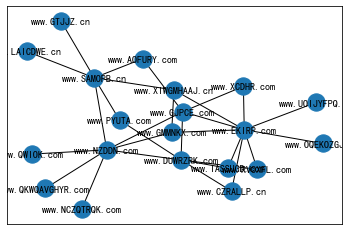

In [169]:
nx.draw_networkx(websites_network, font_size=10)

由上图可以看出，www.EKIRP.com 网站被链接的次数更多。

### 7.2 PageRank 排序

In [171]:
sorted(nx.pagerank(websites_network).items(), key=lambda x: x[1], reverse=True)

[('www.EKIRP.com', 0.15380374347524345),
 ('www.NZDDN.com', 0.1179645855242934),
 ('www.SAMOPB.cn', 0.10339198381980841),
 ('www.DUWRZRK.com', 0.09303615427207722),
 ('www.GJPCE.com', 0.07742151136363946),
 ('www.XIWGMHAAJ.cn', 0.049044794557105094),
 ('www.GMMNKX.com', 0.048794177752061366),
 ('www.PYUTA.com', 0.035326655195903854),
 ('www.AOFURY.com', 0.03530829708535522),
 ('www.CZRALLP.cn', 0.0337531441966754),
 ('www.RVOXFL.com', 0.0337531441966754),
 ('www.IASSUGD.com', 0.0337531441966754),
 ('www.XCDHR.com', 0.03373478608612676),
 ('www.LAICDWE.cn', 0.022146750928639044),
 ('www.GTJJZ.cn', 0.022146750928639044),
 ('www.NCZQTRQK.com', 0.021824632187420128),
 ('www.QWIOK.com', 0.021824632187420128),
 ('www.QKWQAVGHYR.com', 0.021824632187420128),
 ('www.OQEKOZGJ.cn', 0.020573239929410583),
 ('www.UOIJYFPQ.cn', 0.020573239929410583)]

结果和图示一样。

## 0. 使用reduce和and_求交集

In [65]:
from functools import reduce
from operator import and_

In [60]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [64]:
reduce(and_, (d1, d2, d3))

{3}